In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras import backend as K
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Exploration:

In [2]:
data = pd.read_csv("data.csv",skiprows=1).iloc[:,1:]
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
#checking if there are any missing values in this dataset
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [4]:
#checking the overall dataset
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<AxesSubplot:>

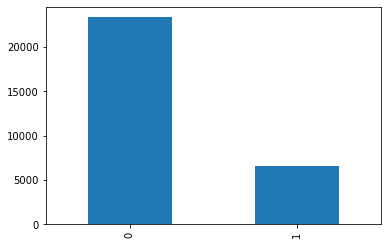

In [5]:
#Analyse the target variable
data['default payment next month'].value_counts().plot.bar()

As per the visualiation above, the target variable is imbalanced. Thus, will use SMOTE technique to balance out the dataset at the later stage.

# Data Preprocessing:

Balance the dataset using SMOTE

In [7]:
y = data['default payment next month']
X = data.drop('default payment next month',axis=1)

import joblib
from collections import Counter
from imblearn.over_sampling import SMOTEN
smt = SMOTEN(random_state=45, k_neighbors=5)
X_resampled_sm, y_resampled_sm = smt.fit_resample(X,y)
print(f"Total length of len:{len(X_resampled_sm)}")
print(f"New Distribution of out target label:{sorted(Counter(y_resampled_sm).items())}") 

Total length of len:46728
New Distribution of out target label:[(0, 23364), (1, 23364)]


Normalise the dataset using MinMaxScalar

In [8]:
scaler = MinMaxScaler()
X_trans= scaler.fit_transform(X_resampled_sm)

Split the dataset into training set and testing set in the proportion of 70%:30%

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_trans,y_resampled_sm,test_size = 0.3,random_state = 42)

# Model Selection:

In [10]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

def model_selection(X_train, Y_train):
    models = []
    models.append(('RFC', RandomForestClassifier()))
    models.append(('ADA', AdaBoostClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('XGB', XGBClassifier()))
    models.append(('SVM', SVC()))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: Accuracy: %f " % (name, abs(cv_results.mean()))
        print(msg)

In [11]:
#choose the model based on highest accuracy
model_selection(X_train, y_train)

RFC: Accuracy: 0.868996 
ADA: Accuracy: 0.807514 
KNN: Accuracy: 0.798649 
CART: Accuracy: 0.805099 
GBC: Accuracy: 0.828762 
XGB: Accuracy: 0.854933 
SVM: Accuracy: 0.785777 


In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Instantiating the random forest classifier with the default parameters.
rfc = RandomForestClassifier()

# Training the model
rfc.fit(X_train,y_train)

# Making predictions
predictions = rfc.predict(X_test)
train_predictions = rfc.predict(X_train)


RF_train_SCORE=accuracy_score(y_train, train_predictions)
print("\nTrain Accuracy using sklearn RF model:",
RF_train_SCORE)
RF_test_SCORE=accuracy_score(y_test, predictions)
print("\nTest Accuracy using sklearn RF model:",
RF_test_SCORE)


Train Accuracy using sklearn RF model: 0.999357974869302

Test Accuracy using sklearn RF model: 0.8676795777159569


In [13]:
from sklearn.metrics import confusion_matrix,classification_report

# Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7005
           1       0.89      0.84      0.86      7014

    accuracy                           0.87     14019
   macro avg       0.87      0.87      0.87     14019
weighted avg       0.87      0.87      0.87     14019



In [14]:
# Confusion Matrix
print(confusion_matrix(y_test, predictions))

[[6299  706]
 [1149 5865]]


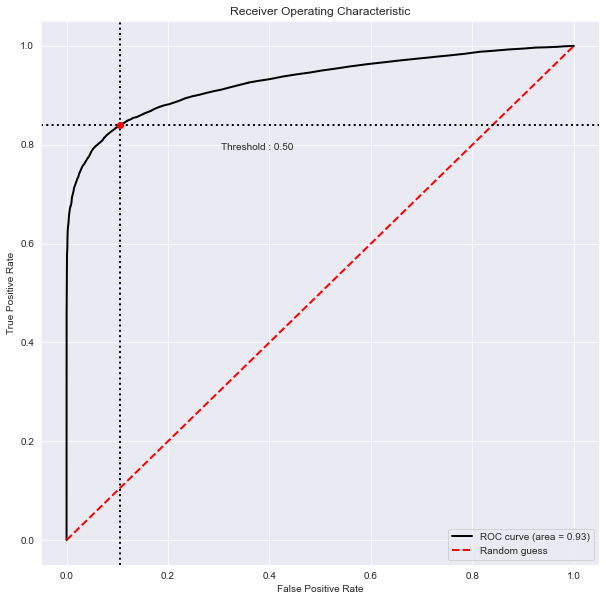

In [15]:
# Use predict_proba to predict probability of the class
y_pred = rfc.predict_proba(X_test)[:,1]

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

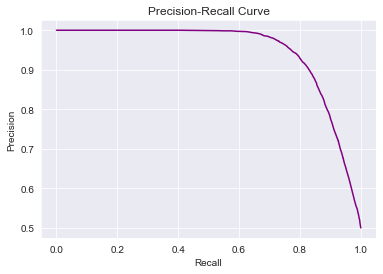

In [16]:
from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

# Features Importance:

In [17]:
feature_imp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

PAY_0        0.087256
LIMIT_BAL    0.086047
AGE          0.071749
PAY_AMT1     0.070947
PAY_AMT2     0.067856
BILL_AMT1    0.063004
PAY_AMT3     0.055605
PAY_AMT6     0.054355
BILL_AMT2    0.046622
PAY_AMT4     0.045129
BILL_AMT4    0.042717
BILL_AMT6    0.040421
BILL_AMT3    0.040274
PAY_AMT5     0.039723
BILL_AMT5    0.038310
PAY_2        0.035260
PAY_3        0.020893
MARRIAGE     0.019475
EDUCATION    0.017408
PAY_4        0.016461
PAY_6        0.015481
PAY_5        0.014914
SEX          0.010093
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


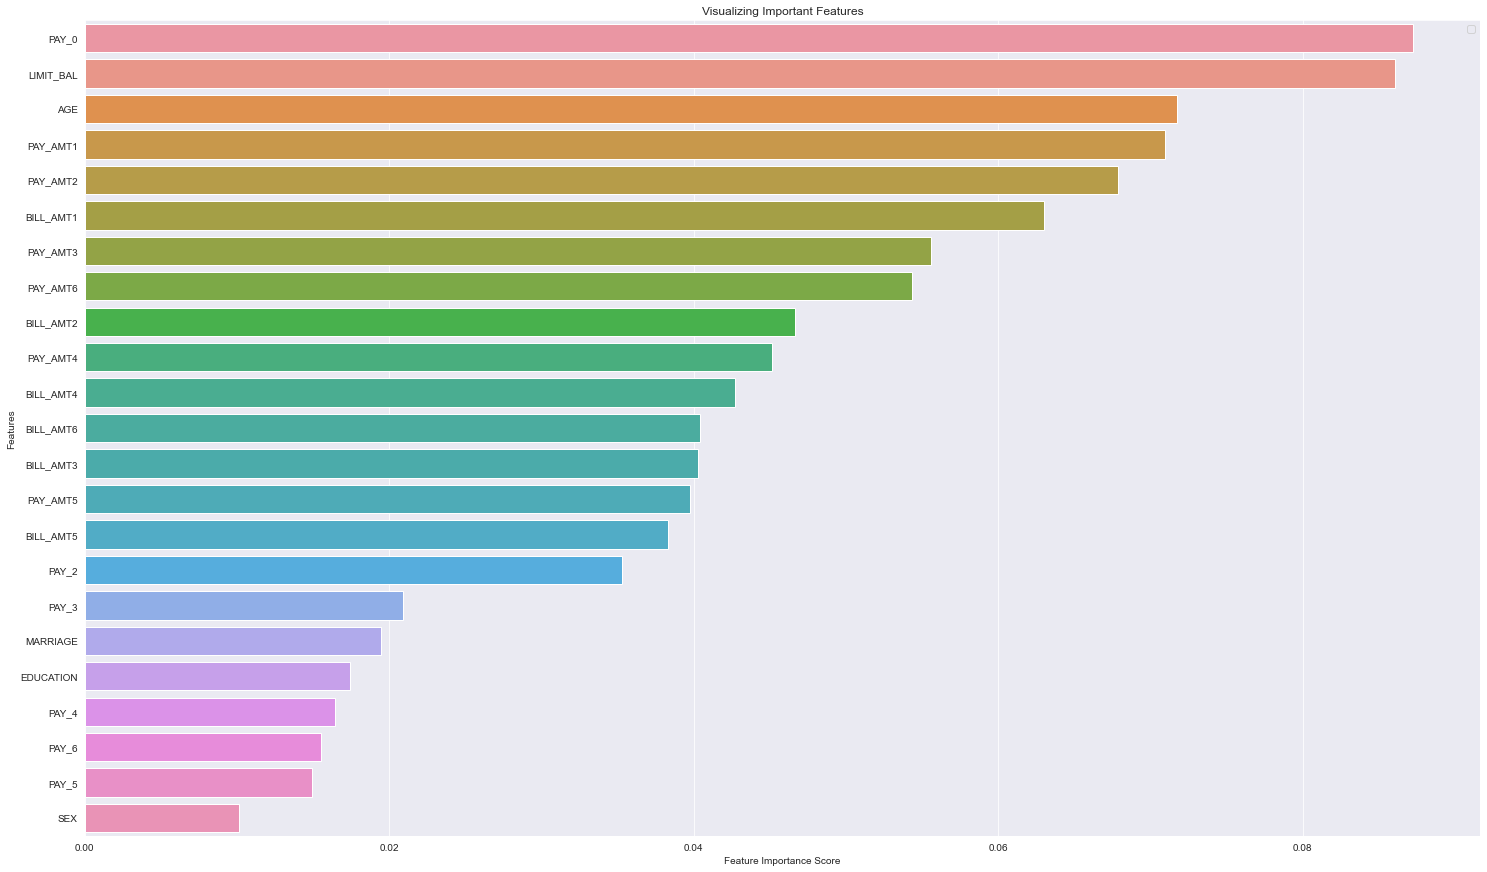

In [18]:
# Creating a bar plot
plt.figure(figsize=(25,15))
sns.barplot(x=feature_imp, 
            y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Based on the visualisation above, the top 5 variables are:</br>

- PAY_0(repayment status in September, 2005)</br>

- LIMIT_BAL(Amount of the given credit)</br>

- AGE</br>

- PAY_AMT1(amount paid in September, 2005)</br>

- PAY_AMT2(amount paid in August, 2005)

# Artificial Neural Network(ANN)

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras import backend as K

In [20]:
# to get the type of activation in each layer
def model_layers(model):
    re=[]
    for idex in range(len(model.layers)):
        name=model.layers[idex].get_config()['name']
        if idex == 0:
            act=None
        else:
            act=model.layers[idex].get_config()['activation']
        output=f"At {name}, type of activation used: {act}."
        re.append(output)
    return re

In [28]:
lst=[]

for activation_function in ['relu', 'tanh', 'linear']:
    for optimiser in ['adam', 'Nadam', 'RMSprop']:
        for neuron_L1 in [30,120,200]:
            for neuron_L2 in [None,30,120]:
                if neuron_L2 == None:
                    neuron_L3_lst=[None]
                else:
                    neuron_L3_lst=[None,30,120]
                    
                for neuron_L3 in neuron_L3_lst:
                    input_layer = Input(shape=(23,),name='input_layer')
                    Layer_1 = Dense(neuron_L1, activation=activation_function,name='Layer_1')(input_layer)
                    layer_branch= Layer_1
                    neuron_branch = neuron_L1
                    
                    if neuron_L2 != None:
                        Layer_2 = Dense(neuron_L2, activation=activation_function,name='Layer_2')(Layer_1)
                        layer_branch= Layer_2
                        neuron_branch = neuron_L2
                    
                    if neuron_L3 != None:
                        Layer_3 = Dense(neuron_L3, activation=activation_function,name='Layer_3')(Layer_2)
                        layer_branch= Layer_3
                        neuron_branch = neuron_L3
                    
                    pred_output= Dense(1, activation="linear",name='pred_output')(layer_branch)
                    
                    Branched_layer=Dense(neuron_branch, activation=activation_function,name='Branched_layer')(layer_branch)
                    
                    model = Model(inputs=input_layer,outputs=pred_output)

                    model.compile(optimizer=optimiser,
                                  loss={'pred_output':'binary_crossentropy'},
                                  metrics=['accuracy'])
                    model.fit(X_train,y_train,
                               epochs=100, batch_size=128, validation_data=(X_test,y_test))
                    
                    stringlist = []
                    model.summary(print_fn=lambda x: stringlist.append(x))
                    short_model_summary = "\n".join(stringlist)
                    type_layer_activation= model_layers(model)
                    prediction = model.predict(X_test)
                    rounded = [round(x[0]) for x in prediction]
                    acc=accuracy_score(y_test, rounded)
                    results=acc,model.optimizer,short_model_summary,type_layer_activation
                    lst.append(results)                    

Epoch 1/100
256/256 [==============================] - 1s 1ms/step - loss: 0.6698 - accuracy: 0.6282 - val_loss: 0.5935 - val_accuracy: 0.7074
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.7265 - val_loss: 0.5736 - val_accuracy: 0.7368
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5613 - accuracy: 0.7413 - val_loss: 0.5617 - val_accuracy: 0.7419
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5494 - accuracy: 0.7487 - val_loss: 0.5653 - val_accuracy: 0.7443
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5502 - accuracy: 0.7460 - val_loss: 0.5576 - val_accuracy: 0.7469
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5470 - accuracy: 0.7508 - val_loss: 0.5562 - val_accuracy: 0.7471
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.7434 - val_loss: 0.5561 - val_accuracy: 0.7428

Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4856 - accuracy: 0.7777 - val_loss: 0.5067 - val_accuracy: 0.7701
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.7801 - val_loss: 0.5041 - val_accuracy: 0.7706
Epoch 60/100
256/256 [==============================] - 0s 992us/step - loss: 0.4817 - accuracy: 0.7790 - val_loss: 0.5050 - val_accuracy: 0.7709
Epoch 61/100
256/256 [==============================] - 0s 992us/step - loss: 0.4883 - accuracy: 0.7774 - val_loss: 0.5051 - val_accuracy: 0.7720
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7818 - val_loss: 0.5016 - val_accuracy: 0.7749
Epoch 63/100
256/256 [==============================] - 0s 981us/step - loss: 0.4809 - accuracy: 0.7832 - val_loss: 0.5006 - val_accuracy: 0.7711
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7820 - val_loss: 0.5088 - val_acc

Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.7871 - val_loss: 0.4919 - val_accuracy: 0.7799
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.7882 - val_loss: 0.4835 - val_accuracy: 0.7784
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.7033 - val_loss: 0.5328 - val_accuracy: 0.7628
Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.7823 - val_loss: 0.5028 - val_accuracy: 0.7799
Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7612 - val_loss: 0.5033 - val_accuracy: 0.7730
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.7854 - val_loss: 0.5011 - val_accuracy: 0.7755
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.7842 - val_loss: 0.4938 - val_accuracy:

Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7817 - val_loss: 0.5070 - val_accuracy: 0.7735
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7700 - val_loss: 0.4940 - val_accuracy: 0.7718
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7841 - val_loss: 0.4918 - val_accuracy: 0.7745
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.7833 - val_loss: 0.5007 - val_accuracy: 0.7752
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7839 - val_loss: 0.4887 - val_accuracy: 0.7730
Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.7854 - val_loss: 0.4925 - val_accuracy: 0.7776
Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.7856 - val_loss: 0.4955 - val_accuracy:

Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.8040 - val_loss: 0.4521 - val_accuracy: 0.7988
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.7857 - val_loss: 0.5593 - val_accuracy: 0.7607
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7983 - val_loss: 0.4631 - val_accuracy: 0.7940
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.7949 - val_loss: 0.4533 - val_accuracy: 0.7978
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.8053 - val_loss: 0.4471 - val_accuracy: 0.7987
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8069 - val_loss: 0.4471 - val_accuracy: 0.8021
Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.8047 - val_loss: 0.4570 - val_accuracy:

Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.8003 - val_loss: 0.4619 - val_accuracy: 0.7930
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8005 - val_loss: 0.4667 - val_accuracy: 0.7961
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4616 - accuracy: 0.7920 - val_loss: 0.5483 - val_accuracy: 0.7770
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7945 - val_loss: 0.4576 - val_accuracy: 0.7929
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8012 - val_loss: 0.4519 - val_accuracy: 0.7966
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8049 - val_loss: 0.4465 - val_accuracy: 0.7990
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8036 - val_loss: 0.4475 - val_accuracy:

Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8142 - val_loss: 0.4389 - val_accuracy: 0.8050
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8143 - val_loss: 0.4359 - val_accuracy: 0.8090
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6052 - accuracy: 0.6956 - val_loss: 0.5898 - val_accuracy: 0.7457
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5524 - accuracy: 0.7521 - val_loss: 0.5478 - val_accuracy: 0.7589
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.7595 - val_loss: 0.5178 - val_accuracy: 0.7629
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7606 - val_loss: 0.5262 - val_accuracy: 0.7628
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5196 - accuracy: 0.7611 - val_loss: 0.6143 - val_accuracy: 0.6

Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5073 - accuracy: 0.7583 - val_loss: 0.4927 - val_accuracy: 0.7739
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.7352 - accuracy: 0.6392 - val_loss: 0.6091 - val_accuracy: 0.6511
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.7486 - val_loss: 0.5393 - val_accuracy: 0.7645
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5217 - accuracy: 0.7750 - val_loss: 0.5262 - val_accuracy: 0.7681
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7823 - val_loss: 0.5143 - val_accuracy: 0.7726
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.7860 - val_loss: 0.5089 - val_accuracy: 0.7777
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.7868 - val_loss: 0.4928 - val_accuracy:

Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5524 - accuracy: 0.7479 - val_loss: 0.5317 - val_accuracy: 0.7574
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5600 - accuracy: 0.7446 - val_loss: 0.6116 - val_accuracy: 0.6889
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 0.7517 - val_loss: 0.5188 - val_accuracy: 0.7693
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4999 - accuracy: 0.7753 - val_loss: 0.5063 - val_accuracy: 0.7700
Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.7794 - val_loss: 0.5078 - val_accuracy: 0.7721
Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7815 - val_loss: 0.4969 - val_accuracy: 0.7722
Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.7741 - val_loss: 0.5004 - val_accuracy:

Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.7731 - val_loss: 0.4973 - val_accuracy: 0.7824
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7892 - val_loss: 0.4714 - val_accuracy: 0.7889
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.8031 - val_loss: 0.4568 - val_accuracy: 0.7994
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8020 - val_loss: 0.4568 - val_accuracy: 0.8011
Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.7977 - val_loss: 0.4473 - val_accuracy: 0.8005
Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8078 - val_loss: 0.4480 - val_accuracy: 0.8021
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8097 - val_loss: 0.4549 - val_accuracy:

Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.7547 - val_loss: 0.6064 - val_accuracy: 0.7584
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5792 - accuracy: 0.7581 - val_loss: 0.5784 - val_accuracy: 0.7609
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5571 - accuracy: 0.7662 - val_loss: 0.5737 - val_accuracy: 0.7568
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5810 - accuracy: 0.7529 - val_loss: 0.6420 - val_accuracy: 0.6641
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.7624 - val_loss: 0.5656 - val_accuracy: 0.7580
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5579 - accuracy: 0.7672 - val_loss: 0.5740 - val_accuracy: 0.7513
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.7706 - val_loss: 0.5576 - val_accuracy:

Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.8421 - accuracy: 0.6574 - val_loss: 0.5599 - val_accuracy: 0.7462
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.7484 - val_loss: 0.5384 - val_accuracy: 0.7560
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.7634 - val_loss: 0.5315 - val_accuracy: 0.7641
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.7595 - val_loss: 0.5436 - val_accuracy: 0.

Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.7803 - val_loss: 0.4962 - val_accuracy: 0.7720
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.7953 - val_loss: 0.4739 - val_accuracy: 0.7892
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5332 - accuracy: 0.7498 - val_loss: 0.4825 - val_accuracy: 0.7827
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7817 - val_loss: 0.4668 - val_accuracy: 0.7865
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.7639 - val_loss: 0.4823 - val_accuracy: 0.7808
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.7929 - val_loss: 0.4716 - val_accuracy: 0.7891
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.7943 - val_loss: 0.4657 - val_accuracy:

Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.7951 - val_loss: 0.4769 - val_accuracy: 0.7871
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.7877 - val_loss: 0.4768 - val_accuracy: 0.7858
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7632 - val_loss: 0.5211 - val_accuracy: 0.7796
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5472 - accuracy: 0.7378 - val_loss: 0.5245 - val_accuracy: 0.7670
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5390 - accuracy: 0.7499 - val_loss: 0.5032 - val_accuracy: 0.7819
Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.7852 - val_loss: 0.4820 - val_accuracy: 0.7857
Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.7924 - val_loss: 0.4785 - val_accuracy:

Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7959 - val_loss: 0.4627 - val_accuracy: 0.7982
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5026 - accuracy: 0.7616 - val_loss: 0.4625 - val_accuracy: 0.7933
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.8045 - val_loss: 0.4496 - val_accuracy: 0.8018
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8075 - val_loss: 0.4557 - val_accuracy: 0.8003
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.7739 - val_loss: 0.4638 - val_accuracy: 0.8012
Epoch 74/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8079 - val_loss: 0.4915 - val_accuracy: 0.7891
Epoch 75/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7931 - val_loss: 0.4779 - val_accuracy:

Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.7965 - val_loss: 0.5139 - val_accuracy: 0.7750
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.7981 - val_loss: 0.4500 - val_accuracy: 0.7984
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.8038 - val_loss: 0.4471 - val_accuracy: 0.7956
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.8000 - val_loss: 0.4558 - val_accuracy: 0.7951
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4934 - accuracy: 0.7657 - val_loss: 0.4822 - val_accuracy: 0.7771
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.7996 - val_loss: 0.4503 - val_accuracy: 0.7956
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.7984 - val_loss: 0.4728 - val_accuracy:

Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7805 - val_loss: 0.4837 - val_accuracy: 0.7835
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5009 - accuracy: 0.7709 - val_loss: 0.4802 - val_accuracy: 0.7851
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4616 - accuracy: 0.7936 - val_loss: 0.4706 - val_accuracy: 0.7855
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.7953 - val_loss: 0.4728 - val_accuracy: 0.7874
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8005 - val_loss: 0.4771 - val_accuracy: 0.7906
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.8009 - val_loss: 0.4784 - val_accuracy: 0.7923
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7919 - val_loss: 0.4762 - val_accuracy:

Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6646 - accuracy: 0.6843 - val_loss: 0.5635 - val_accuracy: 0.7499
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.7550 - val_loss: 0.5331 - val_accuracy: 0.7534
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.7205 - val_loss: 0.7241 - val_accuracy: 0

Epoch 54/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7687 - val_loss: 0.5078 - val_accuracy: 0.7702
Epoch 55/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7835 - val_loss: 0.5009 - val_accuracy: 0.7790
Epoch 56/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7914 - val_loss: 0.4821 - val_accuracy: 0.7866
Epoch 57/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.7964 - val_loss: 0.4822 - val_accuracy: 0.7876
Epoch 58/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7987 - val_loss: 0.4804 - val_accuracy: 0.7905
Epoch 59/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.7437 - val_loss: 0.5362 - val_accuracy: 0.7711
Epoch 60/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 0.7733 - val_loss: 0.5168 - val_accuracy:

Epoch 11/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7705 - val_loss: 0.5572 - val_accuracy: 0.7748
Epoch 12/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7812 - val_loss: 0.4997 - val_accuracy: 0.7777
Epoch 13/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7478 - val_loss: 0.5264 - val_accuracy: 0.7657
Epoch 14/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7518 - val_loss: 0.5325 - val_accuracy: 0.7773
Epoch 15/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7796 - val_loss: 0.4959 - val_accuracy: 0.7797
Epoch 16/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7892 - val_loss: 0.4843 - val_accuracy: 0.7846
Epoch 17/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7911 - val_loss: 0.4943 - val_accuracy:

Epoch 68/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7981 - val_loss: 0.4499 - val_accuracy: 0.8001
Epoch 69/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.8016 - val_loss: 0.5023 - val_accuracy: 0.7827
Epoch 70/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8066 - val_loss: 0.4501 - val_accuracy: 0.8023
Epoch 71/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7766 - val_loss: 0.4702 - val_accuracy: 0.7968
Epoch 72/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7987 - val_loss: 0.8689 - val_accuracy: 0.5019
Epoch 73/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7452 - val_loss: 0.4703 - val_accuracy: 0.7909
Epoch 74/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8018 - val_loss: 0.4629 - val_accuracy:

Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7663 - val_loss: 0.5353 - val_accuracy: 0.7669
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.7715 - val_loss: 0.5253 - val_accuracy: 0.7712
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4989 - accuracy: 0.7783 - val_loss: 0.5155 - val_accuracy: 0.7706
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7791 - val_loss: 0.5182 - val_accuracy: 0.7723
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0.7793 - val_loss: 0.5080 - val_accuracy: 0.7758
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5245 - accuracy: 0.7619 - val_loss: 0.5127 - val_accuracy: 0.7742
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.7820 - val_loss: 0.5094 - val_accuracy:

Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.7874 - val_loss: 0.4857 - val_accuracy: 0.7896
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7695 - val_loss: 0.5029 - val_accuracy: 0.7924
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.7987 - val_loss: 0.4732 - val_accuracy: 0.7951
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.7993 - val_loss: 0.4711 - val_accuracy: 0.7978
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7979 - val_loss: 0.4715 - val_accuracy: 0.7891
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4923 - accuracy: 0.7750 - val_loss: 0.4719 - val_accuracy: 0.7910
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.7988 - val_loss: 0.4823 - val_accuracy:

Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6696 - accuracy: 0.6757 - val_loss: 0.5589 - val_accuracy: 0.7433
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.7614 - val_loss: 0.5677 - val_accuracy: 

Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.7930 - val_loss: 0.4806 - val_accuracy: 0.7903
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.7981 - val_loss: 0.4764 - val_accuracy: 0.7901
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.7454 - val_loss: 0.4790 - val_accuracy: 0.7871
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7943 - val_loss: 0.4683 - val_accuracy: 0.7902
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.8004 - val_loss: 0.4735 - val_accuracy: 0.7911
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.8043 - val_loss: 0.4699 - val_accuracy: 0.7931
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.8043 - val_loss: 0.4595 - val_accuracy:

Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7695 - val_loss: 0.5249 - val_accuracy: 0.7735
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.7728 - val_loss: 0.6460 - val_accuracy: 0.6337
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7754 - val_loss: 0.5224 - val_accuracy: 0.7483
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.7825 - val_loss: 0.4879 - val_accuracy: 0.7842
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7882 - val_loss: 0.4986 - val_accuracy: 0.7844
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6018 - accuracy: 0.6870 - val_loss: 0.5872 - val_accuracy: 0.7237
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5223 - accuracy: 0.7632 - val_loss: 0.6203 - val_accuracy:

Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6155 - val_loss: 0.6925 - val_accuracy: 0.5122
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5350 - val_loss: 0.6622 - val_accuracy: 0.6171
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5383 - accuracy: 0.7470 - val_loss: 0.4960 - val_accuracy: 0.7764
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4899 - accuracy: 0.7804 - val_loss: 0.5378 - val_accuracy: 0.7439
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4862 - accuracy: 0.7751 - val_loss: 0.4889 - val_accuracy: 0.7778
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.7838 - val_loss: 0.4817 - val_accuracy: 0.7831
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.7932 - val_loss: 0.4811 - val_accuracy:

Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.7756 - val_loss: 0.5009 - val_accuracy: 0.7724
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7745 - val_loss: 0.5097 - val_accuracy: 0.7621
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.7820 - val_loss: 0.5070 - val_accuracy: 0.7749
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7793 - val_loss: 0.4892 - val_accuracy: 0.7795
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7809 - val_loss: 0.4855 - val_accuracy: 0.7804
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.7830 - val_loss: 0.5205 - val_accuracy: 0.7726
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7854 - val_loss: 0.5170 - val_accuracy:

Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.7992 - val_loss: 0.4743 - val_accuracy: 0.7939
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7868 - val_loss: 0.4825 - val_accuracy: 0.7794
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.7967 - val_loss: 0.4817 - val_accuracy: 0.7879
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4890 - accuracy: 0.7685 - val_loss: 0.4772 - val_accuracy: 0.7895
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.7866 - val_loss: 0.4637 - val_accuracy: 0.7967
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.8013 - val_loss: 0.4630 - val_accuracy: 0.7976
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.8045 - val_loss: 0.4570 - val_accuracy:

Epoch 38/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7962 - val_loss: 0.4813 - val_accuracy: 0.7878
Epoch 39/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7963 - val_loss: 0.4823 - val_accuracy: 0.7914
Epoch 40/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7934 - val_loss: 0.4673 - val_accuracy: 0.7963
Epoch 41/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7945 - val_loss: 0.4769 - val_accuracy: 0.7906
Epoch 42/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.8045 - val_loss: 0.4541 - val_accuracy: 0.7987
Epoch 43/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7915 - val_loss: 0.4671 - val_accuracy: 0.7988
Epoch 44/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.8010 - val_loss: 0.4563 - val_accuracy:

Epoch 95/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.8045 - val_loss: 0.4628 - val_accuracy: 0.8004
Epoch 96/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8091 - val_loss: 0.4572 - val_accuracy: 0.8028
Epoch 97/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8124 - val_loss: 0.4549 - val_accuracy: 0.8070
Epoch 98/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.7945 - val_loss: 0.4585 - val_accuracy: 0.8028
Epoch 99/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8112 - val_loss: 0.4585 - val_accuracy: 0.8032
Epoch 100/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8079 - val_loss: 0.4539 - val_accuracy: 0.8067
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 52/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 53/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 54/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 55/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 56/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 57/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 58/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.7519 - val_loss: 0.5488 - val_accuracy: 0.7573
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.7607 - val_loss: 0.5562 - val_accuracy: 0.7534
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5762 - accuracy: 0.7348 - val_loss: 0.5565 - val_accuracy: 0.7506
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.7594 - val_loss: 0.5568 - val_accuracy: 0.7550
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5517 - accuracy: 0.7467 - val_loss: 0.5506 - val_accuracy: 0.7543
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.7637 - val_loss: 0.5474 - val_accuracy: 0.7570
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.7646 - val_loss: 0.5508 - val_accuracy: 

Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.7716 - val_loss: 0.5061 - val_accuracy: 0.7739
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.7848 - val_loss: 0.4957 - val_accuracy: 0.7735
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7853 - val_loss: 0.4968 - val_accuracy: 0.7761
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.7835 - val_loss: 0.4996 - val_accuracy: 0.7739
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7863 - val_loss: 0.4946 - val_accuracy: 0.7767
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7860 - val_loss: 0.4961 - val_accuracy: 0.7769
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7869 - val_loss: 0.4925 - val_accuracy:

Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.7580 - val_loss: 0.5138 - val_accuracy: 0.7744
Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7839 - val_loss: 0.5046 - val_accuracy: 0.7725
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7818 - val_loss: 0.4986 - val_accuracy: 0.7788
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7892 - val_loss: 0.4834 - val_accuracy: 0.7840
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.7767 - val_loss: 0.4994 - val_accuracy: 0.7695
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.7868 - val_loss: 0.4813 - val_accuracy: 0.7843
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7813 - val_loss: 0.4806 - val_accuracy:

Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8010 - val_loss: 0.4611 - val_accuracy: 0.7953
Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.8052 - val_loss: 0.4553 - val_accuracy: 0.8001
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.8070 - val_loss: 0.4495 - val_accuracy: 0.8006
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8075 - val_loss: 0.4517 - val_accuracy: 0.8011
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8100 - val_loss: 0.4490 - val_accuracy: 0.8006
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8113 - val_loss: 0.4516 - val_accuracy: 0.8008
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.8109 - val_loss: 0.4537 - val_accuracy

Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8006 - val_loss: 0.4556 - val_accuracy: 0.7954
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4461 - accuracy: 0.8023 - val_loss: 0.4595 - val_accuracy: 0.7957
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8043 - val_loss: 0.4501 - val_accuracy: 0.7981
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8062 - val_loss: 0.4454 - val_accuracy: 0.8001
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.8078 - val_loss: 0.4469 - val_accuracy: 0.7990
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8021 - val_loss: 0.4509 - val_accuracy: 0.8005
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7914 - val_loss: 0.7194 - val_accuracy:

Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0

Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 36/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 37/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 38/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 39/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 40/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 41/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 42/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 93/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 94/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 95/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 96/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 97/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 98/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 99/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.7771 - val_loss: 0.4965 - val_accuracy: 0.7775
Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5524 - accuracy: 0.7580 - val_loss: 0.5124 - val_accuracy: 0.7710
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.7579 - val_loss: 0.5163 - val_accuracy: 0.7697
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.7792 - val_loss: 0.4971 - val_accuracy: 0.7712
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.7844 - val_loss: 0.4930 - val_accuracy: 0.7802
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7723 - val_loss: 0.4964 - val_accuracy: 0.7809
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7895 - val_loss: 0.4960 - val_accuracy:

Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.7471 - val_loss: 0.5433 - val_accuracy: 0.7640
Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.7573 - val_loss: 0.5339 - val_accuracy: 0.7585
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.7735 - val_loss: 0.5101 - val_accuracy: 0.7697
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4999 - accuracy: 0.7695 - val_loss: 0.4999 - val_accuracy: 0.7759
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7810 - val_loss: 0.5003 - val_accuracy: 0.7762
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4805 - accuracy: 0.7837 - val_loss: 0.4933 - val_accuracy: 0.7783
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7812 - val_loss: 0.5061 - val_accuracy: 0.

Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.8062 - val_loss: 0.4674 - val_accuracy: 0.7931
Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4616 - accuracy: 0.7976 - val_loss: 0.4570 - val_accuracy: 0.7889
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7888 - val_loss: 0.4563 - val_accuracy: 0.7996
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7981 - val_loss: 0.4600 - val_accuracy: 0.7896
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5052 - accuracy: 0.7536 - val_loss: 0.5487 - val_accuracy: 0.7346
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7942 - val_loss: 0.4538 - val_accuracy: 0.7966
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.7868 - val_loss: 0.4778 - val_accuracy:

Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.7893 - val_loss: 0.4840 - val_accuracy: 0.7812
Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.7883 - val_loss: 0.4729 - val_accuracy: 0.7831
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7891 - val_loss: 0.4675 - val_accuracy: 0.7841
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.7946 - val_loss: 0.4580 - val_accuracy: 0.7875
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7682 - val_loss: 0.4703 - val_accuracy: 0.7817
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.7897 - val_loss: 0.4975 - val_accuracy: 0.7814
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.7881 - val_loss: 0.4777 - val_accuracy:

Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.8064 - val_loss: 0.4401 - val_accuracy: 0.8009
Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.7996 - val_loss: 0.4458 - val_accuracy: 0.7981
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8025 - val_loss: 0.4548 - val_accuracy: 0.7941
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.7930 - val_loss: 0.4849 - val_accuracy: 0.7730
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.8044 - val_loss: 0.4476 - val_accuracy: 0.7993
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8090 - val_loss: 0.4590 - val_accuracy: 0.8006
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8058 - val_loss: 0.4593 - val_accuracy:

Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7935 - val_loss: 0.4627 - val_accuracy: 0.7890
Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5221 - accuracy: 0.7521 - val_loss: 0.5128 - val_accuracy: 0.7519
Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4904 - accuracy: 0.7736 - val_loss: 0.5425 - val_accuracy: 0.7423
Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7831 - val_loss: 0.4832 - val_accuracy: 0.7859
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4541 - accuracy: 0.7955 - val_loss: 0.4580 - val_accuracy: 0.7929
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.7934 - val_loss: 0.4568 - val_accuracy: 0.7925
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.7947 - val_loss: 0.4549 - val_accuracy:

Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.7932 - val_loss: 0.4798 - val_accuracy: 0.7882
Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.7290 - val_loss: 0.4879 - val_accuracy: 0.7855
Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8021 - val_loss: 0.4592 - val_accuracy: 0.7931
Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4504 - accuracy: 0.8035 - val_loss: 0.4713 - val_accuracy: 0.7978
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.7920 - val_loss: 0.5350 - val_accuracy: 0.7637
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.7999 - val_loss: 0.4661 - val_accuracy: 0.7953
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.8045 - val_loss: 0.4549 - val_accuracy:

Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8002 - val_loss: 0.4860 - val_accuracy: 0.7944
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7700 - val_loss: 0.5020 - val_accuracy: 0.7814
Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7931 - val_loss: 0.4692 - val_accuracy: 0.7915
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.7369 - val_loss: 0.5464 - val_accuracy: 0.7717
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.7895 - val_loss: 0.4949 - val_accuracy: 0.7872
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7900 - val_loss: 0.4854 - val_accuracy: 0.7810
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7974 - val_loss: 0.4714 - val_accuracy:

Epoch 6/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7445 - val_loss: 0.5306 - val_accuracy: 0.7648
Epoch 7/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7736 - val_loss: 0.5101 - val_accuracy: 0.7708
Epoch 8/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7500 - val_loss: 0.5484 - val_accuracy: 0.7436
Epoch 9/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.7408 - val_loss: 0.5335 - val_accuracy: 0.7585
Epoch 10/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.7705 - val_loss: 0.5213 - val_accuracy: 0.7550
Epoch 11/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7426 - val_loss: 0.5521 - val_accuracy: 0.7655
Epoch 12/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7766 - val_loss: 0.5117 - val_accuracy: 0.7

Epoch 63/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7833 - val_loss: 0.7319 - val_accuracy: 0.6090
Epoch 64/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7558 - val_loss: 0.5036 - val_accuracy: 0.7824
Epoch 65/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7935 - val_loss: 0.4781 - val_accuracy: 0.7939
Epoch 66/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.8019 - val_loss: 0.4716 - val_accuracy: 0.7976
Epoch 67/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7959 - val_loss: 0.4729 - val_accuracy: 0.7949
Epoch 68/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.8042 - val_loss: 0.4882 - val_accuracy: 0.7839
Epoch 69/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.8070 - val_loss: 0.4714 - val_accuracy:

Epoch 20/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7925 - val_loss: 0.4734 - val_accuracy: 0.7941
Epoch 21/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8001 - val_loss: 0.4590 - val_accuracy: 0.7929
Epoch 22/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.7547 - val_loss: 0.5045 - val_accuracy: 0.7762
Epoch 23/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7788 - val_loss: 0.4934 - val_accuracy: 0.7809
Epoch 24/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7771 - val_loss: 0.4741 - val_accuracy: 0.7849
Epoch 25/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7934 - val_loss: 0.4732 - val_accuracy: 0.7915
Epoch 26/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7875 - val_loss: 0.4658 - val_accuracy:

Epoch 77/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7997 - val_loss: 0.5071 - val_accuracy: 0.7887
Epoch 78/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.7655 - val_loss: 0.4795 - val_accuracy: 0.7934
Epoch 79/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.8047 - val_loss: 0.4449 - val_accuracy: 0.8023
Epoch 80/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.7986 - val_loss: 0.4452 - val_accuracy: 0.8051
Epoch 81/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8068 - val_loss: 0.4636 - val_accuracy: 0.7931
Epoch 82/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7865 - val_loss: 0.5331 - val_accuracy: 0.7538
Epoch 83/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7986 - val_loss: 0.4540 - val_accuracy:

Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7784 - val_loss: 0.5057 - val_accuracy: 0.7787
Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7816 - val_loss: 0.5102 - val_accuracy: 0.7767
Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.7850 - val_loss: 0.5184 - val_accuracy: 0.7696
Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5480 - accuracy: 0.7642 - val_loss: 0.5120 - val_accuracy: 0.7757
Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.7844 - val_loss: 0.4988 - val_accuracy: 0.7763
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7828 - val_loss: 0.4974 - val_accuracy: 0.7783
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7868 - val_loss: 0.6497 - val_accuracy:

Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.7984 - val_loss: 0.4761 - val_accuracy: 0.7915
Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8038 - val_loss: 0.4594 - val_accuracy: 0.7991
Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.7967 - val_loss: 0.4675 - val_accuracy: 0.7948
Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7912 - val_loss: 0.4669 - val_accuracy: 0.7919
Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8030 - val_loss: 0.4627 - val_accuracy: 0.7993
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.7728 - val_loss: 0.5820 - val_accuracy: 0.7150
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.7907 - val_loss: 0.4684 - val_accuracy:

Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.7898 - val_loss: 0.4984 - val_accuracy: 0.7834
Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7943 - val_loss: 0.4933 - val_accuracy: 0.7864
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.7930 - val_loss: 0.5069 - val_accuracy: 0.7814
Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7952 - val_loss: 0.4894 - val_accuracy: 0.7840
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7914 - val_loss: 0.4994 - val_accuracy: 0.7849
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.7846 - val_loss: 0.4956 - val_accuracy: 0.7855
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.8065 - accuracy: 0.7346 - val_loss: 0.5498 - val_accuracy:

Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.49

Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.7828 - val_loss: 0.4822 - val_accuracy: 0.7845
Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.6633 - val_loss: 0.5626 - val_accuracy: 0.7507
Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.7759 - val_loss: 0.5032 - val_accuracy: 0.7800
Epoch 22/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.6989 - val_loss: 0.6479 - val_accuracy: 0.6546
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5572 - accuracy: 0.7438 - val_loss: 0.5285 - val_accuracy: 0.7667
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7778 - val_loss: 0.4946 - val_accuracy: 0.7755
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7699 - val_loss: 0.4981 - val_accuracy:

Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7913 - val_loss: 0.5231 - val_accuracy: 0.7487
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7801 - val_loss: 0.4853 - val_accuracy: 0.7848
Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.7943 - val_loss: 0.4782 - val_accuracy: 0.7857
Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.7796 - val_loss: 0.4775 - val_accuracy: 0.7873
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.7978 - val_loss: 0.4685 - val_accuracy: 0.7874
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.7997 - val_loss: 0.4683 - val_accuracy: 0.7904
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4504 - accuracy: 0.8023 - val_loss: 0.4689 - val_accuracy:

Epoch 33/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 34/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 35/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 36/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 37/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 38/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 39/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 90/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 91/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 92/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 93/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 94/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 95/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 96/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 47/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7839 - val_loss: 0.4896 - val_accuracy: 0.7733
Epoch 48/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5123 - accuracy: 0.7627 - val_loss: 0.4997 - val_accuracy: 0.7712
Epoch 49/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7901 - val_loss: 0.4794 - val_accuracy: 0.7857
Epoch 50/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7707 - val_loss: 0.4999 - val_accuracy: 0.7816
Epoch 51/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7934 - val_loss: 0.4747 - val_accuracy: 0.7829
Epoch 52/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.7975 - val_loss: 0.4699 - val_accuracy: 0.7907
Epoch 53/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7871 - val_loss: 0.4673 - val_accuracy:

Epoch 4/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7444 - val_loss: 0.5291 - val_accuracy: 0.7608
Epoch 5/100
256/256 [==============================] - 0s 2ms/step - loss: 5.1648 - accuracy: 0.5918 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 6/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 7/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 8/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 9/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 10/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.499

Epoch 61/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 62/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 63/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 64/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 65/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 66/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 67/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 18/100
256/256 [==============================] - 0s 981us/step - loss: 0.5372 - accuracy: 0.7864 - val_loss: 0.5773 - val_accuracy: 0.7714
Epoch 19/100
256/256 [==============================] - 0s 981us/step - loss: 0.5363 - accuracy: 0.7871 - val_loss: 0.5441 - val_accuracy: 0.7827
Epoch 20/100
256/256 [==============================] - 0s 981us/step - loss: 0.5324 - accuracy: 0.7884 - val_loss: 0.5605 - val_accuracy: 0.7794
Epoch 21/100
256/256 [==============================] - 0s 981us/step - loss: 0.5258 - accuracy: 0.7877 - val_loss: 0.5420 - val_accuracy: 0.7823
Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.7899 - val_loss: 0.5686 - val_accuracy: 0.7780
Epoch 23/100
256/256 [==============================] - 0s 985us/step - loss: 0.5257 - accuracy: 0.7896 - val_loss: 0.5559 - val_accuracy: 0.7822
Epoch 24/100
256/256 [==============================] - 0s 985us/step - loss: 0.5269 - accuracy: 0.7930 - val_loss: 0.5941 - v

Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8016 - val_loss: 0.4737 - val_accuracy: 0.7990
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.8056 - val_loss: 0.4823 - val_accuracy: 0.7976
Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.8040 - val_loss: 0.4823 - val_accuracy: 0.7967
Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.8049 - val_loss: 0.5279 - val_accuracy: 0.7940
Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.8063 - val_loss: 0.5260 - val_accuracy: 0.7955
Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.8056 - val_loss: 0.4705 - val_accuracy: 0.7971
Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4592 - accuracy: 0.8074 - val_loss: 0.4743 - val_accuracy:

Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.8113 - val_loss: 0.4885 - val_accuracy: 0.8036
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.8140 - val_loss: 0.5062 - val_accuracy: 0.8072
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.8109 - val_loss: 0.5091 - val_accuracy: 0.8033
Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.8117 - val_loss: 0.4918 - val_accuracy: 0.7944
Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.8122 - val_loss: 0.4968 - val_accuracy: 0.8053
Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.8131 - val_loss: 0.6132 - val_accuracy: 0.7978
Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.8143 - val_loss: 0.4923 - val_accuracy:

Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.8115 - val_loss: 0.4797 - val_accuracy: 0.7974
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.8096 - val_loss: 0.5076 - val_accuracy: 0.8044
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.8104 - val_loss: 0.5076 - val_accuracy: 0.7991
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.8089 - val_loss: 0.5340 - val_accuracy: 0.7971
Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.8113 - val_loss: 0.5125 - val_accuracy: 0.8074
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.8128 - val_loss: 0.5014 - val_accuracy: 0.8080
Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.8131 - val_loss: 0.4762 - val_accuracy:

Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5641 - accuracy: 0.7545 - val_loss: 0.5431 - val_accuracy: 0.7554
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.7589 - val_loss: 0.5501 - val_accuracy: 0.7628
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.7664 - val_loss: 0.5324 - val_accuracy: 0.7625
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7699 - val_loss: 0.5338 - val_accuracy: 0.7682
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7748 - val_loss: 0.5387 - val_accuracy: 0.7680
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.7793 - val_loss: 0.5110 - val_accuracy: 0.7802
Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.7811 - val_loss: 0.6059 - val_accuracy: 0.7601

Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.8093 - val_loss: 0.5295 - val_accuracy: 0.8093
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.8108 - val_loss: 0.5338 - val_accuracy: 0.8018
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5208 - accuracy: 0.8108 - val_loss: 0.5824 - val_accuracy: 0.7680
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.8096 - val_loss: 0.6877 - val_accuracy: 0.7925
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.8105 - val_loss: 0.5519 - val_accuracy: 0.8048
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.8100 - val_loss: 0.5400 - val_accuracy: 0.8078
Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.8097 - val_loss: 0.5561 - val_accuracy:

Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.7935 - val_loss: 0.5443 - val_accuracy: 0.7697
Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4921 - accuracy: 0.7950 - val_loss: 0.4973 - val_accuracy: 0.7980
Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4997 - accuracy: 0.7886 - val_loss: 0.5458 - val_accuracy: 0.7939
Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7945 - val_loss: 0.5799 - val_accuracy: 0.7914
Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.7996 - val_loss: 0.5097 - val_accuracy: 0.8010
Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.7968 - val_loss: 0.5524 - val_accuracy: 0.7918
Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.8009 - val_loss: 0.5257 - val_accuracy:

Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.8102 - val_loss: 0.5162 - val_accuracy: 0.8006
Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.8087 - val_loss: 0.5122 - val_accuracy: 0.7994
Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.8068 - val_loss: 0.5528 - val_accuracy: 0.7980
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.8098 - val_loss: 0.5444 - val_accuracy: 0.8067
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.8078 - val_loss: 0.5517 - val_accuracy: 0.7968
Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.8033 - val_loss: 0.5287 - val_accuracy: 0.8036
Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5108 - accuracy: 0.8085 - val_loss: 0.5889 - val_accuracy:

Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.8039 - val_loss: 0.5134 - val_accuracy: 0.8023
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5081 - accuracy: 0.8055 - val_loss: 0.5902 - val_accuracy: 0.8023
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.8058 - val_loss: 0.5365 - val_accuracy: 0.8049
Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5217 - accuracy: 0.8063 - val_loss: 0.5317 - val_accuracy: 0.8016
Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5196 - accuracy: 0.8024 - val_loss: 0.5063 - val_accuracy: 0.8058
Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.8087 - val_loss: 0.5806 - val_accuracy: 0.7996
Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.8079 - val_loss: 0.5420 - val_accuracy:

Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.8142 - val_loss: 0.5725 - val_accuracy: 0.8093
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 0.8150 - val_loss: 0.5540 - val_accuracy: 0.8026
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.8138 - val_loss: 0.5728 - val_accuracy: 0.8107
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5343 - accuracy: 0.8145 - val_loss: 0.5782 - val_accuracy: 0.8072
Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.8156 - val_loss: 0.5815 - val_accuracy: 0.8025
Epoch 92/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.8149 - val_loss: 0.5848 - val_accuracy: 0.8017
Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.8160 - val_loss: 0.5631 - val_accuracy:

Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5108 - accuracy: 0.8027 - val_loss: 0.5049 - val_accuracy: 0.7991
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5114 - accuracy: 0.8090 - val_loss: 0.5184 - val_accuracy: 0.8034
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5076 - accuracy: 0.8082 - val_loss: 0.5334 - val_accuracy: 0.8041
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.8079 - val_loss: 0.5375 - val_accuracy: 0.7725
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.8122 - val_loss: 0.5155 - val_accuracy: 0.8000
Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.8112 - val_loss: 0.5542 - val_accuracy: 0.8065
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 0.8059 - val_loss: 0.5358 - val_accuracy:

Epoch 1/100
256/256 [==============================] - 1s 1ms/step - loss: 0.6740 - accuracy: 0.6814 - val_loss: 0.5754 - val_accuracy: 0.7391
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.7536 - val_loss: 0.5733 - val_accuracy: 0.7557
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5626 - accuracy: 0.7605 - val_loss: 0.5539 - val_accuracy: 0.7660
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5633 - accuracy: 0.7663 - val_loss: 0.5637 - val_accuracy: 0.7602
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5550 - accuracy: 0.7692 - val_loss: 0.5575 - val_accuracy: 0.7630
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.7698 - val_loss: 0.5802 - val_accuracy: 0.7667
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5611 - accuracy: 0.7751 - val_loss: 0.5571 - val_accuracy: 0.7710

Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5102 - accuracy: 0.8122 - val_loss: 0.5140 - val_accuracy: 0.8058
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5062 - accuracy: 0.8120 - val_loss: 0.5500 - val_accuracy: 0.8063
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.8101 - val_loss: 0.5416 - val_accuracy: 0.8048
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5058 - accuracy: 0.8115 - val_loss: 0.5108 - val_accuracy: 0.8091
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.8134 - val_loss: 0.5252 - val_accuracy: 0.7966
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.8123 - val_loss: 0.5234 - val_accuracy: 0.8080
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5130 - accuracy: 0.8112 - val_loss: 0.5348 - val_accuracy:

Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.8020 - val_loss: 0.4946 - val_accuracy: 0.7917
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.8052 - val_loss: 0.4907 - val_accuracy: 0.8020
Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4932 - accuracy: 0.8039 - val_loss: 0.5655 - val_accuracy: 0.7832
Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.8049 - val_loss: 0.5165 - val_accuracy: 0.7988
Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.8042 - val_loss: 0.5433 - val_accuracy: 0.7522
Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.8058 - val_loss: 0.5144 - val_accuracy: 0.7796
Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.8078 - val_loss: 0.5081 - val_accuracy:

Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.8118 - val_loss: 0.5261 - val_accuracy: 0.7963
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.8150 - val_loss: 0.5192 - val_accuracy: 0.8093
Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.8135 - val_loss: 0.5273 - val_accuracy: 0.8064
Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.8144 - val_loss: 0.5083 - val_accuracy: 0.8083
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.8166 - val_loss: 0.5720 - val_accuracy: 0.8028
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.8153 - val_loss: 0.5770 - val_accuracy: 0.8085
Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.8117 - val_loss: 0.5630 - val_accuracy:

Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.49

Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7964 - val_loss: 0.5083 - val_accuracy: 0.8009
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.8031 - val_loss: 0.5574 - val_accuracy: 0.7881
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5147 - accuracy: 0.8019 - val_loss: 0.7627 - val_accuracy: 0.7701
Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.8024 - val_loss: 0.5249 - val_accuracy: 0.8067
Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5129 - accuracy: 0.8038 - val_loss: 0.5118 - val_accuracy: 0.8036
Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5195 - accuracy: 0.8039 - val_loss: 0.5701 - val_accuracy: 0.8056
Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.8044 - val_loss: 0.5147 - val_accuracy:

Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5396 - accuracy: 0.8162 - val_loss: 0.6036 - val_accuracy: 0.7972
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.8163 - val_loss: 0.5969 - val_accuracy: 0.8111
Epoch 73/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.8189 - val_loss: 0.5646 - val_accuracy: 0.8107
Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5459 - accuracy: 0.8190 - val_loss: 0.5609 - val_accuracy: 0.8118
Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.8195 - val_loss: 0.5705 - val_accuracy: 0.8078
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.8228 - val_loss: 0.6647 - val_accuracy: 0.8130
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.8207 - val_loss: 0.6131 - val_accuracy:

Epoch 28/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.8096 - val_loss: 0.5396 - val_accuracy: 0.8051
Epoch 29/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.8103 - val_loss: 0.5195 - val_accuracy: 0.8070
Epoch 30/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.8097 - val_loss: 0.5209 - val_accuracy: 0.7911
Epoch 31/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.8101 - val_loss: 0.5551 - val_accuracy: 0.8078
Epoch 32/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.8114 - val_loss: 0.5439 - val_accuracy: 0.7908
Epoch 33/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.8103 - val_loss: 0.6962 - val_accuracy: 0.8102
Epoch 34/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8106 - val_loss: 0.5464 - val_accuracy:

Epoch 85/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8194 - val_loss: 0.6070 - val_accuracy: 0.8119
Epoch 86/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5423 - accuracy: 0.8213 - val_loss: 0.6799 - val_accuracy: 0.8038
Epoch 87/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.8208 - val_loss: 0.5548 - val_accuracy: 0.8138
Epoch 88/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.8213 - val_loss: 0.5864 - val_accuracy: 0.8028
Epoch 89/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.8206 - val_loss: 0.5442 - val_accuracy: 0.8167
Epoch 90/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.8211 - val_loss: 0.5394 - val_accuracy: 0.8140
Epoch 91/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.8199 - val_loss: 0.6994 - val_accuracy:

Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5099 - accuracy: 0.8097 - val_loss: 0.5054 - val_accuracy: 0.8038
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5052 - accuracy: 0.8091 - val_loss: 0.5932 - val_accuracy: 0.8034
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5095 - accuracy: 0.8094 - val_loss: 0.5608 - val_accuracy: 0.7958
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5078 - accuracy: 0.8074 - val_loss: 0.5251 - val_accuracy: 0.8046
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.8123 - val_loss: 0.5380 - val_accuracy: 0.8083
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.8087 - val_loss: 0.5163 - val_accuracy: 0.8063
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.8103 - val_loss: 0.5287 - val_accuracy:

Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5172 - accuracy: 0.8102 - val_loss: 0.5649 - val_accuracy: 0.8083
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5265 - accuracy: 0.8147 - val_loss: 0.5476 - val_accuracy: 0.8113
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6140 - accuracy: 0.7096 - val_loss: 0.5892 - val_accuracy: 0.7074
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.7567 - val_loss: 0.5530 - val_accuracy: 0.7588
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5393 - accuracy: 0.7665 - val_loss: 0.5270 - val_accuracy: 0.7703
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.7742 - val_loss: 0.5282 - val_accuracy: 0.7724
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7780 - val_loss: 0.5199 - val_accuracy: 0.7

Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.8149 - val_loss: 0.5016 - val_accuracy: 0.8130
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.8140 - val_loss: 0.4962 - val_accuracy: 0.7963
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.8156 - val_loss: 0.4833 - val_accuracy: 0.8125
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.8137 - val_loss: 0.5238 - val_accuracy: 0.8010
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.8138 - val_loss: 0.5466 - val_accuracy: 0.7693
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5091 - accuracy: 0.8156 - val_loss: 0.6209 - val_accuracy: 0.8067
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.8161 - val_loss: 0.5425 - val_accuracy:

Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4805 - accuracy: 0.8008 - val_loss: 0.5367 - val_accuracy: 0.7898
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.8028 - val_loss: 0.4881 - val_accuracy: 0.8016
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.8035 - val_loss: 0.4948 - val_accuracy: 0.7931
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.8045 - val_loss: 0.5153 - val_accuracy: 0.7884
Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.8049 - val_loss: 0.4822 - val_accuracy: 0.8033
Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.8036 - val_loss: 0.5007 - val_accuracy: 0.7977
Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4890 - accuracy: 0.8065 - val_loss: 0.5457 - val_accuracy:

Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.8193 - val_loss: 0.5444 - val_accuracy: 0.8055
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5299 - accuracy: 0.8169 - val_loss: 0.5755 - val_accuracy: 0.7752
Epoch 72/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.8163 - val_loss: 0.5241 - val_accuracy: 0.8165
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5214 - accuracy: 0.8170 - val_loss: 0.5682 - val_accuracy: 0.8011
Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.8187 - val_loss: 0.5955 - val_accuracy: 0.8113
Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.8190 - val_loss: 0.5672 - val_accuracy: 0.8130
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5246 - accuracy: 0.8190 - val_loss: 0.6031 - val_accuracy:

Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 30/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 32/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5416 - accuracy: 0.8100 - val_loss: 0.5394 - val_accuracy: 0.8034
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5451 - accuracy: 0.8115 - val_loss: 0.6152 - val_accuracy: 0.8042
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.8098 - val_loss: 0.6113 - val_accuracy: 0.8108
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5466 - accuracy: 0.8112 - val_loss: 0.6446 - val_accuracy: 0.7853
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5512 - accuracy: 0.8114 - val_loss: 0.5663 - val_accuracy: 0.8064
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5409 - accuracy: 0.8123 - val_loss: 0.6740 - val_accuracy: 0.8085
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5537 - accuracy: 0.8108 - val_loss: 0.5811 - val_accuracy:

Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.8173 - val_loss: 0.5859 - val_accuracy: 0.8090
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5561 - accuracy: 0.8199 - val_loss: 0.6205 - val_accuracy: 0.8135
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5591 - accuracy: 0.8179 - val_loss: 0.5868 - val_accuracy: 0.8044
Epoch 1/100
256/256 [==============================] - 1s 3ms/step - loss: 0.5766 - accuracy: 0.7327 - val_loss: 0.5703 - val_accuracy: 0.7634
Epoch 2/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.7611 - val_loss: 0.7320 - val_accuracy: 0.7516
Epoch 3/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.7753 - val_loss: 0.6853 - val_accuracy: 0.7500
Epoch 4/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.7809 - val_loss: 0.5343 - val_accuracy: 0.

Epoch 55/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.8148 - val_loss: 0.5164 - val_accuracy: 0.8080
Epoch 56/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.8149 - val_loss: 0.5664 - val_accuracy: 0.8134
Epoch 57/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.8129 - val_loss: 0.5182 - val_accuracy: 0.8033
Epoch 58/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.8125 - val_loss: 0.6162 - val_accuracy: 0.8071
Epoch 59/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.8118 - val_loss: 0.5953 - val_accuracy: 0.8021
Epoch 60/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.8141 - val_loss: 0.5324 - val_accuracy: 0.8115
Epoch 61/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.8130 - val_loss: 0.5474 - val_accuracy:

Epoch 12/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7972 - val_loss: 0.5503 - val_accuracy: 0.7998
Epoch 13/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7983 - val_loss: 0.5001 - val_accuracy: 0.8046
Epoch 14/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7985 - val_loss: 0.5443 - val_accuracy: 0.7628
Epoch 15/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7886 - val_loss: 0.5799 - val_accuracy: 0.7520
Epoch 16/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.7984 - val_loss: 0.6041 - val_accuracy: 0.7961
Epoch 17/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7930 - val_loss: 0.5481 - val_accuracy: 0.7897
Epoch 18/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7998 - val_loss: 0.5820 - val_accuracy:

Epoch 69/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.8171 - val_loss: 0.6506 - val_accuracy: 0.7516
Epoch 70/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.8186 - val_loss: 0.5664 - val_accuracy: 0.8153
Epoch 71/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.8195 - val_loss: 0.5711 - val_accuracy: 0.8062
Epoch 72/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.8192 - val_loss: 0.5452 - val_accuracy: 0.8136
Epoch 73/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.8206 - val_loss: 0.5219 - val_accuracy: 0.8103
Epoch 74/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5208 - accuracy: 0.8184 - val_loss: 0.5445 - val_accuracy: 0.8087
Epoch 75/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.8192 - val_loss: 0.7733 - val_accuracy:

Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.8251 - accuracy: 0.6793 - val_loss: 0.6217 - val_accuracy: 0.6943
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.7127 - val_loss: 0.6003 - val_accuracy: 0.7061
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.7233 - val_loss: 0.5929 - val_accuracy: 0.7161
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.7295 - val_loss: 0.5833 - val_accuracy: 0.7212
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.7341 - val_loss: 0.5821 - val_accuracy: 0.7287
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.7384 - val_loss: 0.5800 - val_accuracy: 0.7323
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5617 - accuracy: 0.7421 - val_loss: 0.5784 - val_accuracy:

Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5540 - accuracy: 0.7528 - val_loss: 0.5606 - val_accuracy: 0.7397
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.7478 - val_loss: 0.5655 - val_accuracy: 0.7468
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6177 - accuracy: 0.6896 - val_loss: 0.5710 - val_accuracy: 0.7289
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5546 - accuracy: 0.7424 - val_loss: 0.5641 - val_accuracy: 0.7366
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7471 - val_loss: 0.5662 - val_accuracy: 0.7334
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5473 - accuracy: 0.7519 - val_loss: 0.5661 - val_accuracy: 0.7408
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5464 - accuracy: 0.7515 - val_loss: 0.5654 - val_accuracy:

Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.7302 - val_loss: 0.5873 - val_accuracy: 0.7076
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5600 - accuracy: 0.7399 - val_loss: 0.5565 - val_accuracy: 0.7410
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5442 - accuracy: 0.7488 - val_loss: 0.5582 - val_accuracy: 0.7413
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.7513 - val_loss: 0.5602 - val_accuracy: 0.7422
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5431 - accuracy: 0.7518 - val_loss: 0.5622 - val_accuracy: 0.7434
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.7529 - val_loss: 0.5548 - val_accuracy: 0.7475
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5389 - accuracy: 0.7551 - val_loss: 0.5555 - val_accuracy:

Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7709 - val_loss: 0.5104 - val_accuracy: 0.7655
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5393 - accuracy: 0.7405 - val_loss: 0.5340 - val_accuracy: 0.7600
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.7701 - val_loss: 0.4963 - val_accuracy: 0.7657
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7725 - val_loss: 0.4918 - val_accuracy: 0.7678
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6147 - accuracy: 0.7005 - val_loss: 0.5839 - val_accuracy: 0.7426
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.7057 - accuracy: 0.6656 - val_loss: 0.6355 - val_accuracy: 0.6407
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.7215 - val_loss: 0.5897 - val_accuracy: 0

Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7351 - val_loss: 0.5771 - val_accuracy: 0.7359
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.7342 - val_loss: 0.5791 - val_accuracy: 0.7356
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.7425 - val_loss: 0.5866 - val_accuracy: 0.7403
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5740 - accuracy: 0.7462 - val_loss: 0.5922 - val_accuracy: 0.7389
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5769 - accuracy: 0.7355 - val_loss: 0.5866 - val_accuracy: 0.7356
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.7109 - accuracy: 0.6646 - val_loss: 0.6065 - val_accuracy: 0.6763
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.7058 - val_loss: 0.5914 - val_accuracy:

Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.7045 - val_loss: 0.5849 - val_accuracy: 0.7112
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.7262 - val_loss: 0.5773 - val_accuracy: 0.7361
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5707 - accuracy: 0.7382 - val_loss: 0.5773 - val_accuracy: 0.7438
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.7381 - val_loss: 0.5815 - val_accuracy: 0.7384
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7396 - val_loss: 0.5906 - val_accuracy: 0.7341
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5736 - accuracy: 0.7433 - val_loss: 0.5820 - val_accuracy: 0.7361
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.7503 - val_loss: 0.6151 - val_accuracy:

Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.7572 - val_loss: 0.5322 - val_accuracy: 0.7522
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.7615 - val_loss: 0.5499 - val_accuracy: 0.7496
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7627 - val_loss: 0.5154 - val_accuracy: 0.7581
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6087 - accuracy: 0.7051 - val_loss: 0.6139 - val_accuracy: 0.7422
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7622 - val_loss: 0.5175 - val_accuracy: 0.7573
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5763 - accuracy: 0.7362 - val_loss: 0.5355 - val_accuracy: 0.7575
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7651 - val_loss: 0.5161 - val_accuracy:

Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5304 - accuracy: 0.7486 - val_loss: 0.5035 - val_accuracy: 0.7679
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7860 - val_loss: 0.4711 - val_accuracy: 0.7781
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.7882 - val_loss: 0.4629 - val_accuracy: 0.7797
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7901 - val_loss: 0.4633 - val_accuracy: 0.7836
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.7927 - val_loss: 0.4602 - val_accuracy: 0.7852
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6606 - accuracy: 0.6707 - val_loss: 0.7469 - val_accuracy: 0.5756
Epoch 2/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7069 - val_loss: 0.6132 - val_accuracy: 

Epoch 53/100
256/256 [==============================] - 0s 2ms/step - loss: 0.7224 - accuracy: 0.7190 - val_loss: 0.9695 - val_accuracy: 0.4507
Epoch 54/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7091 - val_loss: 0.5269 - val_accuracy: 0.7573
Epoch 55/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7650 - val_loss: 0.5182 - val_accuracy: 0.7592
Epoch 56/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7564 - val_loss: 0.5119 - val_accuracy: 0.7575
Epoch 57/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7675 - val_loss: 0.5152 - val_accuracy: 0.7596
Epoch 58/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7649 - val_loss: 0.5176 - val_accuracy: 0.7513
Epoch 59/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7662 - val_loss: 0.5134 - val_accuracy:

Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 0.8931 - accuracy: 0.6945 - val_loss: 0.5907 - val_accuracy: 0.7122
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.7070 - val_loss: 0.5933 - val_accuracy: 0.7185
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5484 - accuracy: 0.7456 - val_loss: 0.5726 - val_accuracy: 0.7444
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.7256 - val_loss: 0.5794 - val_accuracy: 0.7116
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5553 - accuracy: 0.7341 - val_loss: 0.5461 - val_accuracy: 0.7460
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5486 - accuracy: 0.7431 - val_loss: 0.5534 - val_accuracy: 0.7419
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7556 - val_loss: 0.5514 - val_accuracy:

Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5733 - accuracy: 0.7709 - val_loss: 0.9848 - val_accuracy: 0.6304
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7723 - val_loss: 0.4692 - val_accuracy: 0.7778
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.7774 - val_loss: 0.5647 - val_accuracy: 0.7573
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.7820 - val_loss: 0.4677 - val_accuracy: 0.7751
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7879 - val_loss: 0.4636 - val_accuracy: 0.7794
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.7886 - val_loss: 0.4670 - val_accuracy: 0.7764
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.7915 - val_loss: 0.4631 - val_accuracy:

Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7752 - val_loss: 0.7919 - val_accuracy: 0.5032
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5334 - accuracy: 0.7426 - val_loss: 0.4953 - val_accuracy: 0.7739
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.7757 - val_loss: 0.4863 - val_accuracy: 0.7742
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7780 - val_loss: 0.4825 - val_accuracy: 0.7759
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.7818 - val_loss: 0.4811 - val_accuracy: 0.7744
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.7809 - val_loss: 0.4934 - val_accuracy: 0.7747
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4685 - accuracy: 0.7834 - val_loss: 0.4828 - val_accuracy:

Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6274 - accuracy: 0.6955 - val_loss: 0.5956 - val_accuracy:

Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7662 - val_loss: 0.5406 - val_accuracy: 0.7484
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 1.5140 - accuracy: 0.4773 - val_loss: 0.6696 - val_accuracy: 0.6533
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6077 - accuracy: 0.7004 - val_loss: 0.5514 - val_accuracy: 0.7398
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.6574 - val_loss: 0.5568 - val_accuracy: 0.7341
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7488 - val_loss: 0.5385 - val_accuracy: 0.7469
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7569 - val_loss: 0.5339 - val_accuracy: 0.7509
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 6.6071 - accuracy: 0.5360 - val_loss: 7.6197 - val_accuracy:

Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 5.4017 - accuracy: 0.5150 - val_loss: 5.3074 - val_accuracy: 0.4787
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 4.2123 - accuracy: 0.4950 - val_loss: 2.7098 - val_accuracy: 0.4805
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.9585 - accuracy: 0.5382 - val_loss: 0.6789 - val_accuracy: 0.5846
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.6224 - val_loss: 0.6392 - val_accuracy: 0.6435
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.6544 - val_loss: 0.6168 - val_accuracy: 0.6741
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5986 - accuracy: 0.6972 - val_loss: 0.6030 - val_accuracy: 0.6949
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5825 - accuracy: 0.7179 - val_loss: 0.5928 - val_accuracy: 

Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.7337 - val_loss: 0.5693 - val_accuracy: 0.7379
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4999 - accuracy: 0.7646 - val_loss: 0.5033 - val_accuracy: 0.7603
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.7698 - val_loss: 0.5057 - val_accuracy: 0.7621
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7725 - val_loss: 0.5015 - val_accuracy: 0.7635
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4856 - accuracy: 0.7725 - val_loss: 0.5019 - val_accuracy: 0.7636
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.7705 - val_loss: 0.5041 - val_accuracy: 0.7574
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7725 - val_loss: 0.5049 - val_accuracy:

Epoch 23/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7665 - val_loss: 0.5091 - val_accuracy: 0.7595
Epoch 24/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7698 - val_loss: 0.5057 - val_accuracy: 0.7642
Epoch 25/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7711 - val_loss: 0.4945 - val_accuracy: 0.7636
Epoch 26/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7739 - val_loss: 0.4927 - val_accuracy: 0.7677
Epoch 27/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7779 - val_loss: 0.4862 - val_accuracy: 0.7704
Epoch 28/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7794 - val_loss: 0.4931 - val_accuracy: 0.7608
Epoch 29/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7810 - val_loss: 0.4774 - val_accuracy:

Epoch 80/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 81/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 82/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 83/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 84/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 85/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 86/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 37/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.7547 - val_loss: 0.5576 - val_accuracy: 0.7444
Epoch 38/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.7299 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 39/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 40/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 41/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 42/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 43/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 94/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 95/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 96/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 97/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 98/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 99/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 100/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy

Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5720 - accuracy: 0.7450 - val_loss: 0.5913 - val_accuracy: 0.7313
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.7373 - val_loss: 0.6013 - val_accuracy: 0.7471
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5831 - accuracy: 0.7275 - val_loss: 0.5812 - val_accuracy: 0.7350
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5689 - accuracy: 0.7412 - val_loss: 0.5856 - val_accuracy: 0.7117
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.6897 - val_loss: 0.5892 - val_accuracy: 0.7232
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7374 - val_loss: 0.5844 - val_accuracy: 0.7302
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7396 - val_loss: 0.5798 - val_accuracy:

Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5558 - accuracy: 0.7483 - val_loss: 0.5607 - val_accuracy: 0.7415
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.7383 - val_loss: 0.5765 - val_accuracy: 0.7479
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.7530 - val_loss: 0.5493 - val_accuracy: 0.7515
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.7920 - accuracy: 0.6898 - val_loss: 0.5625 - val_accuracy: 0.7285
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6113 - accuracy: 0.7080 - val_loss: 0.5650 - val_accuracy: 0.7424
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5751 - accuracy: 0.7356 - val_loss: 0.5523 - val_accuracy: 0.7384
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.7544 - val_loss: 0.5589 - val_accuracy: 0

Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.7903 - val_loss: 0.4602 - val_accuracy: 0.7829
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.7903 - val_loss: 0.4592 - val_accuracy: 0.7844
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4515 - accuracy: 0.7904 - val_loss: 0.4721 - val_accuracy: 0.7787
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.7863 - val_loss: 0.4672 - val_accuracy: 0.7878
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.7915 - val_loss: 0.4624 - val_accuracy: 0.7868
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.7911 - val_loss: 0.4566 - val_accuracy: 0.7857
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.7940 - val_loss: 0.4580 - val_accuracy:

Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 0.7846 - accuracy: 0.6790 - val_loss: 0.5703 - val_accuracy: 0.7100
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5515 - accuracy: 0.7249 - val_loss: 0.5485 - val_accuracy: 0.7193
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5251 - accuracy: 0.7349 - val_loss: 0.5223 - val_accuracy: 0.7323
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 3.9848 - accuracy: 0.6268 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 26/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 36/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy: 0.5005
Epoch 37/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy: 0.5005
Epoch 38/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy: 0.5005
Epoch 39/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy: 0.5005
Epoch 40/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy: 0.5005
Epoch 41/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy: 0.5005
Epoch 42/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy:

Epoch 93/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy: 0.5005
Epoch 94/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy: 0.5005
Epoch 95/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy: 0.5005
Epoch 96/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy: 0.5005
Epoch 97/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy: 0.5005
Epoch 98/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy: 0.5005
Epoch 99/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6249 - accuracy: 0.5000 - val_loss: 7.6176 - val_accuracy:

Epoch 50/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 51/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 52/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 53/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 54/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 55/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 56/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 7/100
256/256 [==============================] - 0s 2ms/step - loss: 2.3154 - accuracy: 0.6589 - val_loss: 7.5656 - val_accuracy: 0.5007
Epoch 8/100
256/256 [==============================] - 0s 2ms/step - loss: 1.4361 - accuracy: 0.6137 - val_loss: 0.6181 - val_accuracy: 0.6976
Epoch 9/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7361 - val_loss: 0.5800 - val_accuracy: 0.7274
Epoch 10/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.7441 - val_loss: 0.5664 - val_accuracy: 0.7269
Epoch 11/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.7473 - val_loss: 0.5529 - val_accuracy: 0.7487
Epoch 12/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7546 - val_loss: 0.5594 - val_accuracy: 0.7402
Epoch 13/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.7569 - val_loss: 0.5547 - val_accuracy: 0.

Epoch 64/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 65/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 66/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 67/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 68/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 69/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 70/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 21/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy: 0.4996
Epoch 22/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy: 0.4996
Epoch 23/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy: 0.4996
Epoch 24/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy: 0.4996
Epoch 25/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy: 0.4996
Epoch 26/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy: 0.4996
Epoch 27/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy:

Epoch 78/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy: 0.4996
Epoch 79/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy: 0.4996
Epoch 80/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy: 0.4996
Epoch 81/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy: 0.4996
Epoch 82/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy: 0.4996
Epoch 83/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy: 0.4996
Epoch 84/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7122 - accuracy: 0.5000 - val_loss: 7.7185 - val_accuracy:

Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5383 - accuracy: 0.7584 - val_loss: 0.5514 - val_accuracy: 0.7573
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.7651 - val_loss: 0.5775 - val_accuracy: 0.7579
Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5751 - accuracy: 0.7215 - val_loss: 0.5505 - val_accuracy: 0.7548
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.7597 - val_loss: 5.1967 - val_accuracy: 0.5020
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6033 - accuracy: 0.4999 - val_loss: 7.6188 - val_accuracy: 0.5003
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6263 - accuracy: 0.4999 - val_loss: 7.6188 - val_accuracy: 0.5003
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6263 - accuracy: 0.4999 - val_loss: 7.6188 - val_accuracy:

Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.7418 - val_loss: 0.5724 - val_accuracy: 0.7396
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.7367 - val_loss: 0.6545 - val_accuracy: 0.6306
Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.7349 - val_loss: 0.6043 - val_accuracy: 0.7463
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.7478 - val_loss: 0.5743 - val_accuracy: 0.7481
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5602 - accuracy: 0.7501 - val_loss: 0.5685 - val_accuracy: 0.7382
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.7306 - val_loss: 0.5737 - val_accuracy: 0.7471
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5467 - accuracy: 0.7567 - val_loss: 0.5555 - val_accuracy: 0.7

Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.7180 - val_loss: 0.5828 - val_accuracy: 0.7280
Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5639 - accuracy: 0.7377 - val_loss: 0.5961 - val_accuracy: 0.7283
Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5794 - accuracy: 0.7444 - val_loss: 0.6032 - val_accuracy: 0.7434
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5768 - accuracy: 0.7425 - val_loss: 0.5962 - val_accuracy: 0.7449
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5749 - accuracy: 0.7444 - val_loss: 0.6063 - val_accuracy: 0.7379
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.7298 - val_loss: 0.5812 - val_accuracy: 0.7324
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.7337 - val_loss: 0.5811 - val_accuracy:

Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5627 - accuracy: 0.7391 - val_loss: 0.5799 - val_accuracy: 0.7448
Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.7274 - val_loss: 0.5716 - val_accuracy: 0.7327
Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5712 - accuracy: 0.7233 - val_loss: 0.5659 - val_accuracy: 0.7320
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.7433 - val_loss: 0.5626 - val_accuracy: 0.7412
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7533 - val_loss: 0.5677 - val_accuracy: 0.7453
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5564 - accuracy: 0.7444 - val_loss: 0.5552 - val_accuracy: 0.7482
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.7557 - val_loss: 0.5714 - val_accuracy:

Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.6982 - val_loss: 0.5930 - val_accuracy: 0.7244
Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.7414 - val_loss: 0.5834 - val_accuracy: 0.7359
Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.7384 - val_loss: 0.5864 - val_accuracy: 0.7293
Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.7409 - val_loss: 0.5877 - val_accuracy: 0.7299
Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.7389 - val_loss: 0.5846 - val_accuracy: 0.7257
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.7392 - val_loss: 0.5911 - val_accuracy: 0.7389
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5725 - accuracy: 0.7436 - val_loss: 0.6325 - val_accuracy:

Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5043 - accuracy: 0.7621 - val_loss: 0.5174 - val_accuracy: 0.7547
Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.7640 - val_loss: 0.5164 - val_accuracy: 0.7547
Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.7639 - val_loss: 0.5186 - val_accuracy: 0.7524
Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.7650 - val_loss: 0.5142 - val_accuracy: 0.7583
Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.7674 - val_loss: 0.5211 - val_accuracy: 0.7540
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4976 - accuracy: 0.7676 - val_loss: 0.5138 - val_accuracy: 0.7600
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5041 - accuracy: 0.7640 - val_loss: 0.5086 - val_accuracy:

Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 5/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.7210 - val_loss: 0.6031 - val_accuracy: 0.7301
Epoch 6/100
256/256 [==============================] - 0s 2ms/step - loss: 1.2973 - accuracy: 0.7119 - val_loss: 7.7187 - val_accuracy: 0.4995
Epoch 7/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7118 - accuracy: 0.5000 - val_loss: 7.7187 - val_accuracy: 0.4995
Epoch 8/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7118 - accuracy: 0.5000 - val_loss: 7.7187 - val_accuracy: 0.4995
Epoch 9/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7118 - accuracy: 0.5000 - val_loss: 7.7187 - val_accuracy: 0.4995
Epoch 10/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7118 - accuracy: 0.5000 - val_loss: 7.7187 - val_accuracy: 0.4995
Epoch 11/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7118 - accuracy: 0.5000 - val_loss: 7.7187 - val_accuracy: 0.49

Epoch 62/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7118 - accuracy: 0.5000 - val_loss: 7.7176 - val_accuracy: 0.4996
Epoch 63/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7118 - accuracy: 0.5000 - val_loss: 7.7176 - val_accuracy: 0.4996
Epoch 64/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7118 - accuracy: 0.5000 - val_loss: 7.7176 - val_accuracy: 0.4996
Epoch 65/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7117 - accuracy: 0.5000 - val_loss: 7.7176 - val_accuracy: 0.4996
Epoch 66/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7118 - accuracy: 0.5000 - val_loss: 7.7176 - val_accuracy: 0.4996
Epoch 67/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7118 - accuracy: 0.5000 - val_loss: 7.7176 - val_accuracy: 0.4996
Epoch 68/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7118 - accuracy: 0.5000 - val_loss: 7.7176 - val_accuracy:

Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 1.5232 - accuracy: 0.7001 - val_loss: 7.4357 - val_accuracy: 0.5004
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6622 - accuracy: 0.5011 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.499

Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 32/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7636 - val_loss: 0.5107 - val_accuracy: 0.7557
Epoch 33/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7725 - val_loss: 0.4884 - val_accuracy: 0.7707
Epoch 34/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7832 - val_loss: 0.4897 - val_accuracy: 0.7791
Epoch 35/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7838 - val_loss: 0.4792 - val_accuracy: 0.7804
Epoch 36/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7883 - val_loss: 0.4763 - val_accuracy: 0.7754
Epoch 37/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7581 - val_loss: 0.5197 - val_accuracy: 0.7559
Epoch 38/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7725 - val_loss: 0.4863 - val_accuracy:

Epoch 89/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7959 - val_loss: 0.4743 - val_accuracy: 0.7884
Epoch 90/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.7982 - val_loss: 0.4602 - val_accuracy: 0.7897
Epoch 91/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7994 - val_loss: 0.4611 - val_accuracy: 0.7880
Epoch 92/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8015 - val_loss: 0.4511 - val_accuracy: 0.7911
Epoch 93/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.8024 - val_loss: 0.4484 - val_accuracy: 0.7944
Epoch 94/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8020 - val_loss: 0.4636 - val_accuracy: 0.7941
Epoch 95/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8037 - val_loss: 0.4516 - val_accuracy:

Epoch 46/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 47/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 48/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 49/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 50/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 51/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 52/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5975 - accuracy: 0.7370 - val_loss: 0.5871 - val_accuracy: 0.7226
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.7751 - accuracy: 0.7360 - val_loss: 3.0099 - val_accuracy: 0.5475
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.7105 - val_loss: 0.6341 - val_accuracy: 0.6654
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.7297 - val_loss: 0.5830 - val_accuracy: 0.7351
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.7423 - val_loss: 0.5898 - val_accuracy: 0.7426
Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.7464 - val_loss: 0.6049 - val_accuracy: 0.7391
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 3.1232 - accuracy: 0.6560 - val_loss: 7.5139 - val_accuracy: 0.5025

Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.7652 - val_loss: 0.5004 - val_accuracy: 0.7665
Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7764 - val_loss: 0.5004 - val_accuracy: 0.7677
Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7760 - val_loss: 0.4988 - val_accuracy: 0.7690
Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7768 - val_loss: 0.5942 - val_accuracy: 0.6890
Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.7715 - val_loss: 0.5587 - val_accuracy: 0.7100
Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4843 - accuracy: 0.7738 - val_loss: 0.4859 - val_accuracy: 0.7707
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7801 - val_loss: 0.4814 - val_accuracy:

Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.7851 - val_loss: 0.4688 - val_accuracy: 0.7807
Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.7894 - val_loss: 0.4862 - val_accuracy: 0.7819
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.7896 - val_loss: 0.4656 - val_accuracy: 0.7843
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.7913 - val_loss: 0.6864 - val_accuracy: 0.6945
Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.7886 - val_loss: 0.4764 - val_accuracy: 0.7809
Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.7924 - val_loss: 0.4729 - val_accuracy: 0.7849
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.7934 - val_loss: 0.4596 - val_accuracy:

Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 45/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 46/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 47/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 48/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 49/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 50/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 51/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 2/100
256/256 [==============================] - 0s 2ms/step - loss: 4.2703 - accuracy: 0.6313 - val_loss: 4.2295 - val_accuracy: 0.6301
Epoch 3/100
256/256 [==============================] - 0s 2ms/step - loss: 4.1697 - accuracy: 0.6387 - val_loss: 4.2314 - val_accuracy: 0.6269
Epoch 4/100
256/256 [==============================] - 0s 2ms/step - loss: 4.7844 - accuracy: 0.5356 - val_loss: 6.8924 - val_accuracy: 0.5462
Epoch 5/100
256/256 [==============================] - 0s 2ms/step - loss: 6.6728 - accuracy: 0.5607 - val_loss: 6.8014 - val_accuracy: 0.5490
Epoch 6/100
256/256 [==============================] - 0s 2ms/step - loss: 4.9300 - accuracy: 0.5779 - val_loss: 4.4084 - val_accuracy: 0.5935
Epoch 7/100
256/256 [==============================] - 0s 2ms/step - loss: 4.2490 - accuracy: 0.6104 - val_loss: 4.2507 - val_accuracy: 0.6065
Epoch 8/100
256/256 [==============================] - 0s 2ms/step - loss: 4.2041 - accuracy: 0.6220 - val_loss: 4.2308 - val_accuracy: 0.6212

Epoch 59/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 60/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 61/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 62/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 63/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 64/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 65/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 16/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 17/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 18/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 19/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 20/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 21/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 22/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 73/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 74/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 75/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 76/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 77/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 78/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 79/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 30/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 31/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 32/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 33/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 34/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 35/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 36/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 87/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 88/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 89/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 90/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 91/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 92/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 93/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.7580 - val_loss: 0.6181 - val_accuracy: 0.7620
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.7620 - val_loss: 0.6052 - val_accuracy: 0.7515
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.7626 - val_loss: 0.6169 - val_accuracy: 0.7513
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5946 - accuracy: 0.7611 - val_loss: 0.6096 - val_accuracy: 0.7588
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5983 - accuracy: 0.7525 - val_loss: 0.6193 - val_accuracy: 0.7608
Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5882 - accuracy: 0.7611 - val_loss: 0.5988 - val_accuracy: 0.7573
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.7612 - val_loss: 0.5932 - val_accuracy:

Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997

Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7671 - val_loss: 0.5109 - val_accuracy: 0.7550
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.7743 - val_loss: 0.5059 - val_accuracy: 0.7596
Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5032 - accuracy: 0.7629 - val_loss: 0.4950 - val_accuracy: 0.7640
Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.7733 - val_loss: 0.5033 - val_accuracy: 0.7589
Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.7729 - val_loss: 0.4994 - val_accuracy: 0.7647
Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.7742 - val_loss: 0.5049 - val_accuracy: 0.7623
Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.7656 - val_loss: 0.5047 - val_accuracy:

Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.8016 - val_loss: 0.4870 - val_accuracy: 0.7921
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.8036 - val_loss: 0.4610 - val_accuracy: 0.7930
Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8027 - val_loss: 0.4451 - val_accuracy: 0.7942
Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.8013 - val_loss: 0.4478 - val_accuracy: 0.7939
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.8020 - val_loss: 0.4634 - val_accuracy: 0.7913
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.8030 - val_loss: 0.4787 - val_accuracy: 0.7951
Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8039 - val_loss: 0.4479 - val_accuracy:

Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5153 - accuracy: 0.7743 - val_loss: 0.5383 - val_accuracy: 0.7419
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5072 - accuracy: 0.7730 - val_loss: 0.5100 - val_accuracy: 0.7641
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5071 - accuracy: 0.7729 - val_loss: 0.5572 - val_accuracy: 0.7681
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5114 - accuracy: 0.7735 - val_loss: 0.5209 - val_accuracy: 0.7626
Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5026 - accuracy: 0.7749 - val_loss: 0.5407 - val_accuracy: 0.7657
Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.7774 - val_loss: 0.5284 - val_accuracy: 0.7725
Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7794 - val_loss: 0.5109 - val_accuracy:

Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.7980 - val_loss: 0.4676 - val_accuracy: 0.7931
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8010 - val_loss: 0.4906 - val_accuracy: 0.7919
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.7991 - val_loss: 0.4890 - val_accuracy: 0.7871
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.8000 - val_loss: 0.4494 - val_accuracy: 0.7939
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.7996 - val_loss: 0.4573 - val_accuracy: 0.7905
Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.7977 - val_loss: 0.5345 - val_accuracy: 0.7874
Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.7986 - val_loss: 0.4514 - val_accuracy:

Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7704 - val_loss: 0.5263 - val_accuracy: 0.7628
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7727 - val_loss: 0.5102 - val_accuracy: 0.7636
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.7753 - val_loss: 0.5013 - val_accuracy: 0.7682
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7761 - val_loss: 0.5327 - val_accuracy: 0.7603
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.7737 - val_loss: 0.5018 - val_accuracy: 0.7677
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.7765 - val_loss: 0.5084 - val_accuracy: 0.7664
Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0.7756 - val_loss: 0.5022 - val_accuracy:

Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7954 - val_loss: 0.4737 - val_accuracy: 0.7882
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.49

Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 14/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 15/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 16/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 18/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 19/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 20/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 71/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 72/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 75/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.7406 - val_loss: 0.6471 - val_accuracy: 0.7524
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.7531 - val_loss: 0.6260 - val_accuracy: 0.7329
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.7548 - val_loss: 0.6430 - val_accuracy: 0.7575
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6205 - accuracy: 0.7567 - val_loss: 0.6556 - val_accuracy: 0.7521
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.7571 - val_loss: 0.6315 - val_accuracy: 0.7482
Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.7605 - val_loss: 0.6565 - val_accuracy: 0.7510
Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6313 - accuracy: 0.7554 - val_loss: 0.6300 - val_accuracy:

Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5997 - accuracy: 0.7667 - val_loss: 0.6183 - val_accuracy: 0.7459
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6091 - accuracy: 0.7687 - val_loss: 0.6371 - val_accuracy: 0.7704
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.7692 - val_loss: 0.6213 - val_accuracy: 0.7640
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5941 - accuracy: 0.7689 - val_loss: 0.6111 - val_accuracy: 0.7622
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.7665 - val_loss: 0.6181 - val_accuracy: 0.7690
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.7721 - val_loss: 0.6042 - val_accuracy: 0.7626
Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5963 - accuracy: 0.7702 - val_loss: 0.6419 - val_accuracy:

Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.7987 - val_loss: 0.5029 - val_accuracy: 0.7805
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.7974 - val_loss: 0.4836 - val_accuracy: 0.7843
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7998 - val_loss: 0.4720 - val_accuracy: 0.7936
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7982 - val_loss: 0.5205 - val_accuracy: 0.7885
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7975 - val_loss: 0.4662 - val_accuracy: 0.7947
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.7963 - val_loss: 0.5201 - val_accuracy: 0.7894
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.7986 - val_loss: 0.4733 - val_accuracy:

Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.8047 - val_loss: 0.4772 - val_accuracy: 0.7997
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.8062 - val_loss: 0.4737 - val_accuracy: 0.7998
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6498 - accuracy: 0.7001 - val_loss: 0.6958 - val_accuracy: 0.7389
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.7323 - val_loss: 0.5812 - val_accuracy: 0.7354
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.7399 - val_loss: 0.5697 - val_accuracy: 0.7271
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5831 - accuracy: 0.7413 - val_loss: 0.5647 - val_accuracy: 0.7536
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.7553 - val_loss: 0.5922 - val_accuracy: 0.7

Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.8079 - val_loss: 0.4996 - val_accuracy: 0.7627
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.8103 - val_loss: 0.4364 - val_accuracy: 0.8071
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8109 - val_loss: 0.5433 - val_accuracy: 0.7397
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8093 - val_loss: 0.4362 - val_accuracy: 0.8063
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8100 - val_loss: 0.4804 - val_accuracy: 0.7935
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.8126 - val_loss: 0.4394 - val_accuracy: 0.8018
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8107 - val_loss: 0.4513 - val_accuracy:

Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 0.7704 - val_loss: 0.5230 - val_accuracy: 0.7518
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7698 - val_loss: 0.5313 - val_accuracy: 0.7533
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5090 - accuracy: 0.7716 - val_loss: 0.5261 - val_accuracy: 0.7521
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7724 - val_loss: 0.5282 - val_accuracy: 0.7596
Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.7702 - val_loss: 0.5374 - val_accuracy: 0.7589
Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7720 - val_loss: 0.5153 - val_accuracy: 0.7610
Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.7720 - val_loss: 0.5013 - val_accuracy:

Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.8030 - val_loss: 0.4811 - val_accuracy: 0.7734
Epoch 71/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8013 - val_loss: 0.4772 - val_accuracy: 0.7958
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8042 - val_loss: 0.4761 - val_accuracy: 0.7958
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.8042 - val_loss: 0.4733 - val_accuracy: 0.7948
Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.8011 - val_loss: 0.4441 - val_accuracy: 0.7952
Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8020 - val_loss: 0.4573 - val_accuracy: 0.7983
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.8044 - val_loss: 0.4717 - val_accuracy:

Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7710 - val_loss: 0.5380 - val_accuracy: 0.7597
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5037 - accuracy: 0.7737 - val_loss: 0.5035 - val_accuracy: 0.7602
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.7740 - val_loss: 0.5086 - val_accuracy: 0.7601
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7742 - val_loss: 0.5015 - val_accuracy: 0.7661
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.7746 - val_loss: 0.5556 - val_accuracy: 0.7577
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4910 - accuracy: 0.7740 - val_loss: 0.5026 - val_accuracy: 0.7634
Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7759 - val_loss: 0.5155 - val_accuracy:

Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.8023 - val_loss: 0.4684 - val_accuracy: 0.7921
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8009 - val_loss: 0.4731 - val_accuracy: 0.7921
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.7998 - val_loss: 0.4604 - val_accuracy: 0.7938
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.8023 - val_loss: 0.4576 - val_accuracy: 0.7901
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8024 - val_loss: 0.4917 - val_accuracy: 0.7891
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8017 - val_loss: 0.4667 - val_accuracy: 0.7967
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.8035 - val_loss: 0.4621 - val_accuracy:

Epoch 41/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.8050 - val_loss: 0.4443 - val_accuracy: 0.8020
Epoch 42/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.8065 - val_loss: 0.4733 - val_accuracy: 0.8069
Epoch 43/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8072 - val_loss: 0.4578 - val_accuracy: 0.8067
Epoch 44/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8076 - val_loss: 0.4738 - val_accuracy: 0.8001
Epoch 45/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8084 - val_loss: 0.4502 - val_accuracy: 0.8065
Epoch 46/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8083 - val_loss: 0.4829 - val_accuracy: 0.7976
Epoch 47/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8070 - val_loss: 0.5542 - val_accuracy:

Epoch 98/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8166 - val_loss: 0.4432 - val_accuracy: 0.8084
Epoch 99/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8176 - val_loss: 0.4388 - val_accuracy: 0.8119
Epoch 100/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8175 - val_loss: 0.4439 - val_accuracy: 0.8094
Epoch 1/100
256/256 [==============================] - 1s 3ms/step - loss: 0.8706 - accuracy: 0.6570 - val_loss: 0.6769 - val_accuracy: 0.7207
Epoch 2/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.7245 - val_loss: 0.6807 - val_accuracy: 0.7342
Epoch 3/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.7358 - val_loss: 0.6943 - val_accuracy: 0.7040
Epoch 4/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.7373 - val_loss: 0.6341 - val_accuracy: 0.

Epoch 55/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.8030 - val_loss: 0.4686 - val_accuracy: 0.7961
Epoch 56/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8037 - val_loss: 0.4592 - val_accuracy: 0.7972
Epoch 57/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8019 - val_loss: 0.4457 - val_accuracy: 0.7956
Epoch 58/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8032 - val_loss: 0.4896 - val_accuracy: 0.7979
Epoch 59/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.8042 - val_loss: 0.4511 - val_accuracy: 0.8003
Epoch 60/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8046 - val_loss: 0.4546 - val_accuracy: 0.7973
Epoch 61/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8036 - val_loss: 0.4519 - val_accuracy:

Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.7567 - val_loss: 0.6514 - val_accuracy: 0.7538
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.7503 - val_loss: 0.6555 - val_accuracy: 0.7273
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6257 - accuracy: 0.7518 - val_loss: 0.6444 - val_accuracy: 0.7558
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.7436 - val_loss: 0.6030 - val_accuracy: 0.7426
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6146 - accuracy: 0.7511 - val_loss: 0.6190 - val_accuracy: 0.7518
Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.7525 - val_loss: 0.6550 - val_accuracy: 0.7657
Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.7550 - val_loss: 0.6417 - val_accuracy:

Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.7510 - val_loss: 0.6639 - val_accuracy: 0.7626
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6210 - accuracy: 0.7600 - val_loss: 0.6694 - val_accuracy: 0.7619
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6114 - accuracy: 0.7551 - val_loss: 0.6530 - val_accuracy: 0.7556
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6122 - accuracy: 0.7588 - val_loss: 0.6192 - val_accuracy: 0.7457
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.7605 - val_loss: 0.6487 - val_accuracy: 0.7302
Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.7624 - val_loss: 0.6258 - val_accuracy: 0.7536
Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6076 - accuracy: 0.7558 - val_loss: 0.6117 - val_accuracy:

Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.7866 - val_loss: 0.4722 - val_accuracy: 0.7809
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.7896 - val_loss: 0.4832 - val_accuracy: 0.7734
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.7915 - val_loss: 0.5055 - val_accuracy: 0.7639
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.7916 - val_loss: 0.4681 - val_accuracy: 0.7832
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.7944 - val_loss: 0.4597 - val_accuracy: 0.7868
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.7937 - val_loss: 0.4649 - val_accuracy: 0.7886
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.7946 - val_loss: 0.4587 - val_accuracy:

Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.8063 - val_loss: 0.4785 - val_accuracy: 0.7953
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.8050 - val_loss: 0.4789 - val_accuracy: 0.7953
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7987 - val_loss: 0.4851 - val_accuracy: 0.7981
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.8020 - val_loss: 0.4670 - val_accuracy: 0.7971
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.8034 - val_loss: 0.4852 - val_accuracy: 0.7934
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.8021 - val_loss: 0.4722 - val_accuracy: 0.7961
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.8052 - val_loss: 0.4719 - val_accuracy:

Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.8028 - val_loss: 0.4499 - val_accuracy: 0.8007
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.8069 - val_loss: 0.4879 - val_accuracy: 0.7983
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8050 - val_loss: 0.4726 - val_accuracy: 0.8002
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4504 - accuracy: 0.8077 - val_loss: 0.4546 - val_accuracy: 0.8038
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.8092 - val_loss: 0.5532 - val_accuracy: 0.7446
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8083 - val_loss: 0.4628 - val_accuracy: 0.7874
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8111 - val_loss: 0.4525 - val_accuracy:

Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.8204 - val_loss: 0.4622 - val_accuracy: 0.8105
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8179 - val_loss: 0.4942 - val_accuracy: 0.8106
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8191 - val_loss: 0.5120 - val_accuracy: 0.8005
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8192 - val_loss: 0.4417 - val_accuracy: 0.8134
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6434 - accuracy: 0.6938 - val_loss: 0.5765 - val_accuracy: 0.7287
Epoch 2/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.7329 - val_loss: 0.6504 - val_accuracy: 0.7494
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6069 - accuracy: 0.7452 - val_loss: 0.6165 - val_accuracy: 0

Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7979 - val_loss: 0.5712 - val_accuracy: 0.7897
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4834 - accuracy: 0.7959 - val_loss: 0.6922 - val_accuracy: 0.6475
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7908 - val_loss: 0.5262 - val_accuracy: 0.7803
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.7976 - val_loss: 0.4794 - val_accuracy: 0.7948
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.7975 - val_loss: 0.4652 - val_accuracy: 0.7955
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4600 - accuracy: 0.7997 - val_loss: 0.4813 - val_accuracy: 0.7854
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7992 - val_loss: 0.4838 - val_accuracy:

Epoch 11/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.7478 - val_loss: 0.6830 - val_accuracy: 0.7575
Epoch 12/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.7487 - val_loss: 0.6391 - val_accuracy: 0.7473
Epoch 13/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6053 - accuracy: 0.7472 - val_loss: 0.6201 - val_accuracy: 0.7455
Epoch 14/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.7484 - val_loss: 0.6167 - val_accuracy: 0.7304
Epoch 15/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.7506 - val_loss: 0.7009 - val_accuracy: 0.7620
Epoch 16/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.7522 - val_loss: 0.6462 - val_accuracy: 0.7302
Epoch 17/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7492 - val_loss: 0.6446 - val_accuracy:

Epoch 68/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8039 - val_loss: 0.4758 - val_accuracy: 0.7937
Epoch 69/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8028 - val_loss: 0.4890 - val_accuracy: 0.7929
Epoch 70/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8031 - val_loss: 0.4565 - val_accuracy: 0.7954
Epoch 71/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8043 - val_loss: 0.4879 - val_accuracy: 0.7925
Epoch 72/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8038 - val_loss: 0.4730 - val_accuracy: 0.7956
Epoch 73/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.8042 - val_loss: 0.5133 - val_accuracy: 0.7931
Epoch 74/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8033 - val_loss: 0.5062 - val_accuracy:

Epoch 25/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.8001 - val_loss: 0.4866 - val_accuracy: 0.7879
Epoch 26/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8002 - val_loss: 0.5767 - val_accuracy: 0.7501
Epoch 27/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.8019 - val_loss: 0.4547 - val_accuracy: 0.7993
Epoch 28/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.8008 - val_loss: 0.5315 - val_accuracy: 0.7904
Epoch 29/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7989 - val_loss: 0.5061 - val_accuracy: 0.7958
Epoch 30/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8015 - val_loss: 0.4642 - val_accuracy: 0.7941
Epoch 31/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.7994 - val_loss: 0.4948 - val_accuracy:

Epoch 82/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8148 - val_loss: 0.4467 - val_accuracy: 0.8148
Epoch 83/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.8130 - val_loss: 0.6165 - val_accuracy: 0.7889
Epoch 84/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.8152 - val_loss: 0.5210 - val_accuracy: 0.8065
Epoch 85/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8155 - val_loss: 0.4718 - val_accuracy: 0.7996
Epoch 86/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8162 - val_loss: 0.4673 - val_accuracy: 0.8111
Epoch 87/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8163 - val_loss: 0.4916 - val_accuracy: 0.8082
Epoch 88/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8157 - val_loss: 0.4832 - val_accuracy:

Epoch 39/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4656 - accuracy: 0.7996 - val_loss: 0.4777 - val_accuracy: 0.7941
Epoch 40/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4654 - accuracy: 0.7987 - val_loss: 0.4625 - val_accuracy: 0.7900
Epoch 41/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4622 - accuracy: 0.7995 - val_loss: 0.4691 - val_accuracy: 0.7918
Epoch 42/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4621 - accuracy: 0.8008 - val_loss: 0.4597 - val_accuracy: 0.7945
Epoch 43/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4639 - accuracy: 0.7998 - val_loss: 0.4646 - val_accuracy: 0.7973
Epoch 44/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4576 - accuracy: 0.8008 - val_loss: 0.4706 - val_accuracy: 0.7941
Epoch 45/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4678 - accuracy: 0.7964 - val_loss: 0.4661 - val_accuracy:

Epoch 96/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4390 - accuracy: 0.8107 - val_loss: 0.4412 - val_accuracy: 0.8026
Epoch 97/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4354 - accuracy: 0.8111 - val_loss: 0.4791 - val_accuracy: 0.7948
Epoch 98/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.8132 - val_loss: 0.4512 - val_accuracy: 0.8027
Epoch 99/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4314 - accuracy: 0.8114 - val_loss: 0.4487 - val_accuracy: 0.8074
Epoch 100/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4273 - accuracy: 0.8124 - val_loss: 0.4574 - val_accuracy: 0.8085
Epoch 1/100
256/256 [==============================] - 1s 1ms/step - loss: 0.8551 - accuracy: 0.5911 - val_loss: 0.6360 - val_accuracy: 0.6654
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.7019 - val_loss: 0.6067 - val_accuracy: 

Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.7419 - val_loss: 0.5914 - val_accuracy: 0.7422
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7438 - val_loss: 0.6012 - val_accuracy: 0.7420
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.7473 - val_loss: 0.9306 - val_accuracy: 0.6130
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5785 - accuracy: 0.7370 - val_loss: 0.5836 - val_accuracy: 0.7326
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5922 - accuracy: 0.7260 - val_loss: 0.5799 - val_accuracy: 0.7346
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7400 - val_loss: 0.5773 - val_accuracy: 0.7268
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 1.7593 - accuracy: 0.6460 - val_loss: 0.5953 - val_accuracy:

Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5767 - accuracy: 0.7288 - val_loss: 0.5856 - val_accuracy: 0.7371
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5732 - accuracy: 0.7342 - val_loss: 0.5874 - val_accuracy: 0.7080
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5948 - accuracy: 0.7205 - val_loss: 0.5850 - val_accuracy: 0.7401
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6616 - accuracy: 0.6780 - val_loss: 0.5874 - val_accuracy: 0.7220
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5733 - accuracy: 0.7296 - val_loss: 0.5855 - val_accuracy: 0.7253
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5666 - accuracy: 0.7371 - val_loss: 0.5920 - val_accuracy: 0.7404
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5622 - accuracy: 0.7362 - val_loss: 0.5875 - val_accuracy:

Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5940 - accuracy: 0.7254 - val_loss: 0.6055 - val_accuracy: 0.6941
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.6296 - val_loss: 0.6072 - val_accuracy: 0.7287
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.7376 - val_loss: 0.5909 - val_accuracy: 0.7334
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5662 - accuracy: 0.7398 - val_loss: 0.5895 - val_accuracy: 0.7302
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5699 - accuracy: 0.7394 - val_loss: 0.5776 - val_accuracy: 0.7377
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7409 - val_loss: 0.5819 - val_accuracy: 0.7083
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5656 - accuracy: 0.7397 - val_loss: 0.5817 - val_accuracy:

Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5707 - accuracy: 0.7346 - val_loss: 0.5844 - val_accuracy: 0.7368
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5800 - accuracy: 0.7140 - val_loss: 0.5857 - val_accuracy: 0.7169
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 0.7069 - val_loss: 0.7050 - val_accuracy: 0.5245
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6330 - accuracy: 0.6700 - val_loss: 0.6003 - val_accuracy: 0.7105
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5834 - accuracy: 0.7143 - val_loss: 0.5853 - val_accuracy: 0.7274
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.7264 - val_loss: 0.5767 - val_accuracy: 0.7301
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5702 - accuracy: 0.7425 - val_loss: 0.5856 - val_accuracy:

Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6499 - val_loss: 0.6173 - val_accuracy: 0.6714
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5950 - accuracy: 0.6979 - val_loss: 0.5919 - val_accuracy: 0.7043
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5758 - accuracy: 0.7279 - val_loss: 0.5857 - val_accuracy: 0.7227
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5922 - accuracy: 0.7123 - val_loss: 0.5788 - val_accuracy: 0.7246
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5679 - accuracy: 0.7412 - val_loss: 0.5876 - val_accuracy: 0.7314
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.7389 - val_loss: 0.5768 - val_accuracy: 0.7181
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6525 - accuracy: 0.6675 - val_loss: 0.6394 - val_accuracy:

Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.7190 - val_loss: 0.5804 - val_accuracy: 0.7214
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5683 - accuracy: 0.7395 - val_loss: 0.5968 - val_accuracy: 0.7223
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.7333 - val_loss: 0.5855 - val_accuracy: 0.7414
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.7443 - val_loss: 0.5934 - val_accuracy: 0.7301
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.7428 - val_loss: 0.5957 - val_accuracy: 0.7436
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5675 - accuracy: 0.7401 - val_loss: 0.5926 - val_accuracy: 0.7261
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.7421 - val_loss: 0.5838 - val_accuracy:

Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 

Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 23/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.6554 - val_loss: 0.6106 - val_accuracy: 0.6981
Epoch 24/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.7202 - val_loss: 0.6054 - val_accuracy: 0.7219
Epoch 25/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7368 - val_loss: 0.6058 - val_accuracy: 0.6978
Epoch 26/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.7417 - val_loss: 0.6096 - val_accuracy: 0.7386
Epoch 27/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.7406 - val_loss: 0.6159 - val_accuracy: 0.7391
Epoch 28/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.7066 - val_loss: 0.5997 - val_accuracy: 0.7050
Epoch 29/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7348 - val_loss: 0.6010 - val_accuracy:

Epoch 80/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7260 - val_loss: 0.5819 - val_accuracy: 0.7224
Epoch 81/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.7390 - val_loss: 0.6201 - val_accuracy: 0.7433
Epoch 82/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.7462 - val_loss: 0.6013 - val_accuracy: 0.7385
Epoch 83/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7386 - val_loss: 0.5803 - val_accuracy: 0.7315
Epoch 84/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.7323 - val_loss: 0.6401 - val_accuracy: 0.7502
Epoch 85/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7447 - val_loss: 0.9978 - val_accuracy: 0.5632
Epoch 86/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.7177 - val_loss: 0.6026 - val_accuracy:

Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5824 - accuracy: 0.7307 - val_loss: 0.5813 - val_accuracy: 0.7341
Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5882 - accuracy: 0.7246 - val_loss: 0.5775 - val_accuracy: 0.7268
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5635 - accuracy: 0.7415 - val_loss: 0.5932 - val_accuracy: 0.7409
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.7697 - accuracy: 0.6842 - val_loss: 0.6142 - val_accuracy: 0.6774
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.7100 - val_loss: 0.5892 - val_accuracy: 0.7152
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7349 - val_loss: 0.5800 - val_accuracy: 0.7299
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5648 - accuracy: 0.7404 - val_loss: 0.5803 - val_accuracy:

Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5758 - accuracy: 0.7385 - val_loss: 0.5860 - val_accuracy: 0.7283
Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5764 - accuracy: 0.7456 - val_loss: 0.5875 - val_accuracy: 0.7161
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5727 - accuracy: 0.7428 - val_loss: 0.5886 - val_accuracy: 0.7399
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5813 - accuracy: 0.7343 - val_loss: 0.5897 - val_accuracy: 0.7437
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6206 - accuracy: 0.7289 - val_loss: 0.5872 - val_accuracy: 0.7267
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.7421 - val_loss: 0.5857 - val_accuracy: 0.7365
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.7453 - val_loss: 0.5853 - val_accuracy

Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.7369 - val_loss: 0.5847 - val_accuracy: 0.7309
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.7294 - val_loss: 0.5845 - val_accuracy: 0.7261
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5912 - accuracy: 0.7234 - val_loss: 0.5791 - val_accuracy: 0.7165
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6004 - accuracy: 0.7097 - val_loss: 0.5815 - val_accuracy: 0.7291
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.7404 - val_loss: 0.5803 - val_accuracy: 0.7282
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.7435 - val_loss: 0.5863 - val_accuracy: 0.7162
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5677 - accuracy: 0.7419 - val_loss: 0.5835 - val_accuracy:

Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.7341 - val_loss: 0.6898 - val_accuracy: 0.6531
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.7196 - val_loss: 0.6605 - val_accuracy: 0.5625
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5898 - accuracy: 0.7077 - val_loss: 0.5924 - val_accuracy: 0.7167
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.7377 - val_loss: 0.6086 - val_accuracy: 0.7241
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5836 - accuracy: 0.7377 - val_loss: 0.5944 - val_accuracy: 0.7386
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.7099 - val_loss: 0.5950 - val_accuracy: 0.7185
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.7299 - val_loss: 0.5859 - val_accuracy: 0

Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.7386 - val_loss: 0.5854 - val_accuracy: 0.7367
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5760 - accuracy: 0.7478 - val_loss: 0.6125 - val_accuracy: 0.7376
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.7461 - val_loss: 0.6128 - val_accuracy: 0.7390
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.7487 - val_loss: 0.6233 - val_accuracy: 0.6932
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.7433 - val_loss: 0.6187 - val_accuracy: 0.7514
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.7472 - val_loss: 0.6179 - val_accuracy: 0.7488
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.7395 - val_loss: 0.6143 - val_accuracy:

Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5808 - accuracy: 0.7382 - val_loss: 0.6106 - val_accuracy: 0.7449
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5721 - accuracy: 0.7371 - val_loss: 0.6218 - val_accuracy: 0.7522
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.7347 - val_loss: 0.6054 - val_accuracy: 0.7487
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.7342 - val_loss: 0.5901 - val_accuracy: 0.7150
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.6866 - val_loss: 0.5879 - val_accuracy: 0.7076
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.7039 - val_loss: 0.6048 - val_accuracy: 0.7017
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7271 - val_loss: 0.8704 - val_accuracy:

Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 50/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 51/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 52/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 53/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 54/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 55/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 56/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 7/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.7289 - val_loss: 0.5936 - val_accuracy: 0.7341
Epoch 8/100
256/256 [==============================] - 0s 2ms/step - loss: 4.0995 - accuracy: 0.5812 - val_loss: 4.8175 - val_accuracy: 0.5893
Epoch 9/100
256/256 [==============================] - 0s 2ms/step - loss: 4.1720 - accuracy: 0.5749 - val_loss: 0.6193 - val_accuracy: 0.6429
Epoch 10/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.7234 - val_loss: 0.5947 - val_accuracy: 0.7197
Epoch 11/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7469 - val_loss: 0.6280 - val_accuracy: 0.7488
Epoch 12/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.7419 - val_loss: 0.5979 - val_accuracy: 0.7368
Epoch 13/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6661 - val_loss: 0.5889 - val_accuracy: 0.

Epoch 64/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.7004 - val_loss: 0.6450 - val_accuracy: 0.5774
Epoch 65/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.6881 - val_loss: 0.5865 - val_accuracy: 0.6984
Epoch 66/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7058 - val_loss: 0.6013 - val_accuracy: 0.7490
Epoch 67/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7455 - val_loss: 0.6094 - val_accuracy: 0.7410
Epoch 68/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.7340 - val_loss: 0.6009 - val_accuracy: 0.6898
Epoch 69/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7387 - val_loss: 0.6280 - val_accuracy: 0.6618
Epoch 70/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7127 - val_loss: 0.5820 - val_accuracy:

Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.7332 - val_loss: 0.5811 - val_accuracy: 0.7174
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5736 - accuracy: 0.7331 - val_loss: 0.5882 - val_accuracy: 0.7302
Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.6931 - val_loss: 0.5986 - val_accuracy: 0.7015
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.7095 - val_loss: 0.5877 - val_accuracy: 0.7393
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6022 - accuracy: 0.7348 - val_loss: 0.6021 - val_accuracy: 0.7411
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.7334 - val_loss: 0.6039 - val_accuracy: 0.7366
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5728 - accuracy: 0.7378 - val_loss: 0.6052 - val_accuracy:

Epoch 6/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7369 - val_loss: 0.6164 - val_accuracy: 0.7254
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.7272 - val_loss: 0.6638 - val_accuracy: 0.7540
Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6036 - accuracy: 0.7319 - val_loss: 0.6372 - val_accuracy: 0.7517
Epoch 9/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7249 - val_loss: 0.6176 - val_accuracy: 0.7541
Epoch 10/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.7068 - val_loss: 0.6629 - val_accuracy: 0.7349
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6023 - accuracy: 0.7473 - val_loss: 0.6333 - val_accuracy: 0.7341
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6170 - accuracy: 0.7294 - val_loss: 0.5829 - val_accuracy: 0.6

Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 20/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 21/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 22/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 23/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 24/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 25/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 26/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 77/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 78/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 79/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 80/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 81/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 82/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 83/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 34/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 35/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 36/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 37/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 38/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 39/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 40/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 91/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 92/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 93/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 94/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 95/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 96/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 97/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 48/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 49/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 50/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 51/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 52/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 53/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 54/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6201 - accuracy: 0.6908 - val_loss: 0.6195 - val_accuracy: 0.6931
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6010 - accuracy: 0.7082 - val_loss: 0.6061 - val_accuracy: 0.7040
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.7138 - val_loss: 0.5996 - val_accuracy: 0.7100
Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6135 - accuracy: 0.7172 - val_loss: 0.7371 - val_accuracy: 0.5471
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.6300 - val_loss: 0.6527 - val_accuracy: 0.6505
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.6647 - val_loss: 0.6318 - val_accuracy: 0.6706
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6210 - accuracy: 0.6848 - val_loss: 0.6230 - val_accuracy: 0.68

Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5810 - accuracy: 0.7186 - val_loss: 0.5964 - val_accuracy: 0.7147
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5767 - accuracy: 0.7267 - val_loss: 0.5930 - val_accuracy: 0.7189
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5742 - accuracy: 0.7217 - val_loss: 0.5873 - val_accuracy: 0.7217
Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.7340 - val_loss: 0.5921 - val_accuracy: 0.7239
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.7213 - val_loss: 0.5851 - val_accuracy: 0.7258
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5688 - accuracy: 0.7323 - val_loss: 0.5880 - val_accuracy: 0.7346
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.7030 - val_loss: 0.5784 - val_accuracy:

Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.7381 - val_loss: 0.5866 - val_accuracy: 0.7362
Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.7296 - val_loss: 0.5824 - val_accuracy: 0.7401
Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.7249 - val_loss: 0.6270 - val_accuracy: 0.6943
Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5921 - accuracy: 0.7329 - val_loss: 0.5950 - val_accuracy: 0.7284
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5802 - accuracy: 0.7410 - val_loss: 0.6009 - val_accuracy: 0.7307
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.7392 - val_loss: 0.5913 - val_accuracy: 0.7354
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5837 - accuracy: 0.7413 - val_loss: 0.5873 - val_accuracy:

Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.7338 - val_loss: 0.5812 - val_accuracy: 0.7207
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.7039 - val_loss: 0.5871 - val_accuracy: 0.7201
Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.7406 - val_loss: 0.5832 - val_accuracy: 0.7277
Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5675 - accuracy: 0.7348 - val_loss: 0.5850 - val_accuracy: 0.7305
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.6410 - val_loss: 0.6430 - val_accuracy: 0.6174
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.7193 - val_loss: 0.6017 - val_accuracy: 0.7120
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.7250 - val_loss: 0.5939 - val_accuracy:

Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5816 - accuracy: 0.7198 - val_loss: 0.5805 - val_accuracy: 0.7105
Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5687 - accuracy: 0.7261 - val_loss: 0.5770 - val_accuracy: 0.7336
Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5654 - accuracy: 0.7363 - val_loss: 0.5991 - val_accuracy: 0.6859
Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5804 - accuracy: 0.7223 - val_loss: 0.6979 - val_accuracy: 0.6110
Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.7150 - val_loss: 0.9094 - val_accuracy: 0.4837
Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5705 - val_loss: 0.6181 - val_accuracy: 0.6789
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.7095 - val_loss: 0.5917 - val_accuracy:

Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6192 - accuracy: 0.5000 - val_loss: 7.6107 - val_accuracy: 0.5005
Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6179 - accuracy: 0.5000 - val_loss: 7.6090 - val_accuracy: 0.5005
Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6159 - accuracy: 0.5000 - val_loss: 7.6078 - val_accuracy: 0.5005
Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6081 - accuracy: 0.5001 - val_loss: 7.5967 - val_accuracy: 0.5007
Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 7.5951 - accuracy: 0.5003 - val_loss: 7.5776 - val_accuracy: 0.5010
Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 7.5660 - accuracy: 0.5007 - val_loss: 7.5324 - val_accuracy: 0.5018
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 2.5261 - accuracy: 0.6280 - val_loss: 0.5977 - val_accuracy:

Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6258 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6258 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6258 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6258 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6258 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6258 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6258 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.7681 - accuracy: 0.7070 - val_loss: 0.6022 - val_accuracy: 0.7192
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5810 - accuracy: 0.7361 - val_loss: 0.5998 - val_accuracy: 0.7376
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5764 - accuracy: 0.7413 - val_loss: 0.5949 - val_accuracy: 0.7314
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.7153 - val_loss: 0.5787 - val_accuracy: 0.7334
Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5820 - accuracy: 0.7337 - val_loss: 0.5921 - val_accuracy: 0.7364
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5739 - accuracy: 0.7416 - val_loss: 0.5940 - val_accuracy: 0.7423
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6158 - accuracy: 0.7134 - val_loss: 0.5996 - val_accuracy: 0.716

Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.7427 - val_loss: 0.5832 - val_accuracy: 0.7316
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5951 - accuracy: 0.7322 - val_loss: 0.6074 - val_accuracy: 0.7255
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.7367 - val_loss: 0.5894 - val_accuracy: 0.7397
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7449 - val_loss: 0.6031 - val_accuracy: 0.7425
Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7325 - val_loss: 0.5807 - val_accuracy: 0.7325
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5687 - accuracy: 0.7362 - val_loss: 0.5983 - val_accuracy: 0.6937
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.7445 - val_loss: 0.5852 - val_accuracy:

Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 32/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 33/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 34/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 35/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 36/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 37/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 38/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 89/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 90/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 91/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 92/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 93/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 94/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 95/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 3.6357 - accuracy: 0.6317 - val_loss: 7.6177 - val_accuracy: 0.5004
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6253 - accuracy: 0.5000 - val_loss: 7.6177 - val_accuracy: 0.5004
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6253 - accuracy: 0.5000 - val_loss: 7.6170 - val_accuracy: 0.5004
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6253 - accuracy: 0.5000 - val_loss: 7.6169 - val_accuracy: 0.5004
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6204 - accuracy: 0.5000 - val_loss: 7.5447 - val_accuracy: 0.5007
Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 1.2243 - accuracy: 0.6917 - val_loss: 0.6040 - val_accuracy: 0.7252
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6049 - accuracy: 0.7262 - val_loss: 0.6267 - val_accuracy: 0.6987

Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5970 - accuracy: 0.7183 - val_loss: 0.5945 - val_accuracy: 0.7267
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5749 - accuracy: 0.7317 - val_loss: 0.5838 - val_accuracy: 0.7248
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5720 - accuracy: 0.7372 - val_loss: 0.5828 - val_accuracy: 0.7336
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.7412 - val_loss: 0.5831 - val_accuracy: 0.7407
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7374 - val_loss: 0.5924 - val_accuracy: 0.7113
Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5687 - accuracy: 0.7432 - val_loss: 0.5826 - val_accuracy: 0.7326
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5802 - accuracy: 0.7350 - val_loss: 0.5807 - val_accuracy:

Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 21/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 77/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 78/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 2/100
256/256 [==============================] - 0s 2ms/step - loss: 3.5950 - accuracy: 0.5994 - val_loss: 4.8550 - val_accuracy: 0.5599
Epoch 3/100
256/256 [==============================] - 0s 2ms/step - loss: 4.9833 - accuracy: 0.5737 - val_loss: 4.8190 - val_accuracy: 0.5845
Epoch 4/100
256/256 [==============================] - 0s 2ms/step - loss: 0.8847 - accuracy: 0.7224 - val_loss: 0.6077 - val_accuracy: 0.7410
Epoch 5/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7347 - val_loss: 0.6004 - val_accuracy: 0.7202
Epoch 6/100
256/256 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.6980 - val_loss: 0.5897 - val_accuracy: 0.7067
Epoch 7/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7247 - val_loss: 0.5874 - val_accuracy: 0.7235
Epoch 8/100
256/256 [==============================] - 0s 2ms/step - loss: 5.0768 - accuracy: 0.5848 - val_loss: 7.7174 - val_accuracy: 0.4997

Epoch 59/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 60/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 61/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 62/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 63/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 64/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 65/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 16/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 17/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 18/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 19/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 20/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 21/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 22/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 73/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 74/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 75/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 76/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 77/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 78/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 79/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.7440 - val_loss: 0.6002 - val_accuracy: 0.7119
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.7447 - val_loss: 0.5865 - val_accuracy: 0.7237
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.7422 - val_loss: 0.5891 - val_accuracy: 0.7355
Epoch 33/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5718 - accuracy: 0.7417 - val_loss: 0.5946 - val_accuracy: 0.7409
Epoch 34/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5902 - accuracy: 0.7362 - val_loss: 0.6617 - val_accuracy: 0.7290
Epoch 35/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5753 - accuracy: 0.7478 - val_loss: 0.5974 - val_accuracy: 0.7225
Epoch 36/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.7391 - val_loss: 0.5857 - val_accuracy:

Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5718 - accuracy: 0.7455 - val_loss: 0.5843 - val_accuracy: 0.7339
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.7115 - val_loss: 0.5837 - val_accuracy: 0.7292
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7405 - val_loss: 0.5844 - val_accuracy: 0.7297
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 1.3720 - accuracy: 0.6838 - val_loss: 0.5898 - val_accuracy: 0.7183
Epoch 91/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5739 - accuracy: 0.7288 - val_loss: 0.5849 - val_accuracy: 0.7193
Epoch 92/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5702 - accuracy: 0.7345 - val_loss: 0.5831 - val_accuracy: 0.7298
Epoch 93/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.7408 - val_loss: 0.5841 - val_accuracy:

Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.7414 - val_loss: 0.5901 - val_accuracy: 0.7436
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6030 - accuracy: 0.7371 - val_loss: 0.5843 - val_accuracy: 0.7291
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.7420 - val_loss: 0.5967 - val_accuracy: 0.7048
Epoch 47/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5753 - accuracy: 0.7391 - val_loss: 0.6020 - val_accuracy: 0.7477
Epoch 48/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7467 - val_loss: 0.6122 - val_accuracy: 0.7421
Epoch 49/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5841 - accuracy: 0.7331 - val_loss: 0.5773 - val_accuracy: 0.7334
Epoch 50/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.6946 - val_loss: 0.5897 - val_accuracy:

Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6754 - accuracy: 0.7036 - val_loss: 0.6095 - val_accuracy: 0.7243
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.7288 - val_loss: 0.5961 - val_accuracy: 0.7304
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.7180 - val_loss: 0.5856 - val_accuracy: 0.7401
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.7080 - accuracy: 0.7079 - val_loss: 0.5780 - val_accuracy: 0.7238
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6295 - accuracy: 0.7367 - val_loss: 0.5945 - val_accuracy: 0.7394
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5947 - accuracy: 0.7308 - val_loss: 0.5741 - val_accuracy: 0.7354
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.7238 - val_loss: 0.5887 - val_accuracy: 0.7313

Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 15/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 16/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 17/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 18/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 19/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 20/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 21/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 72/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 73/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 74/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 75/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 76/100
256/256 [==============================] - 0s 1ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 77/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 78/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7108 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 29/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 30/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 31/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 32/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 33/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 34/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 35/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 86/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 87/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 88/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 89/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 90/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 91/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy: 0.5003
Epoch 92/100
256/256 [==============================] - 0s 2ms/step - loss: 7.6267 - accuracy: 0.4999 - val_loss: 7.6197 - val_accuracy:

Epoch 43/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 44/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 45/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 46/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 47/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 48/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 49/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 100/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 1/100
256/256 [==============================] - 2s 3ms/step - loss: 1.3352 - accuracy: 0.6781 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 2/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 3/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 4/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 5/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 6/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.49

Epoch 57/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 58/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 59/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 60/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 61/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 62/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 63/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 14/100
256/256 [==============================] - 0s 992us/step - loss: 0.6088 - accuracy: 0.7525 - val_loss: 0.6319 - val_accuracy: 0.7540
Epoch 15/100
256/256 [==============================] - 0s 996us/step - loss: 0.6100 - accuracy: 0.7521 - val_loss: 0.6317 - val_accuracy: 0.7391
Epoch 16/100
256/256 [==============================] - 0s 985us/step - loss: 0.6004 - accuracy: 0.7469 - val_loss: 0.6082 - val_accuracy: 0.7449
Epoch 17/100
256/256 [==============================] - 0s 996us/step - loss: 0.6115 - accuracy: 0.7523 - val_loss: 0.6285 - val_accuracy: 0.7476
Epoch 18/100
256/256 [==============================] - 0s 996us/step - loss: 0.6050 - accuracy: 0.7514 - val_loss: 0.6225 - val_accuracy: 0.7457
Epoch 19/100
256/256 [==============================] - 0s 988us/step - loss: 0.6097 - accuracy: 0.7548 - val_loss: 0.6303 - val_accuracy: 0.7432
Epoch 20/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.7489 - val_loss: 0.6440 - v

256/256 [==============================] - 0s 1ms/step - loss: 0.6170 - accuracy: 0.7555 - val_loss: 0.6543 - val_accuracy: 0.7559
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6051 - accuracy: 0.7503 - val_loss: 0.6101 - val_accuracy: 0.7546
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6124 - accuracy: 0.7542 - val_loss: 0.6553 - val_accuracy: 0.7640
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.7612 - val_loss: 0.6368 - val_accuracy: 0.7482
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.7454 - val_loss: 0.6215 - val_accuracy: 0.7319
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.7559 - val_loss: 0.6406 - val_accuracy: 0.7572
Epoch 32/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 0.7569 - val_loss: 0.6195 - val_accuracy: 0.7411
Epoch

Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.7591 - val_loss: 0.6396 - val_accuracy: 0.7506
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.7587 - val_loss: 0.6623 - val_accuracy: 0.7617
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6150 - accuracy: 0.7593 - val_loss: 0.6026 - val_accuracy: 0.7373
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.7532 - val_loss: 0.6125 - val_accuracy: 0.7356
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.7549 - val_loss: 0.6527 - val_accuracy: 0.7459
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.7571 - val_loss: 0.6160 - val_accuracy: 0.7521
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.7524 - val_loss: 0.5964 - val_accuracy:

Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.7473 - val_loss: 0.6384 - val_accuracy: 0.7473
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5903 - accuracy: 0.7439 - val_loss: 0.6118 - val_accuracy: 0.7550
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.7495 - val_loss: 0.5974 - val_accuracy: 0.7332
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6051 - accuracy: 0.7541 - val_loss: 0.6195 - val_accuracy: 0.7561
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6076 - accuracy: 0.7541 - val_loss: 0.6076 - val_accuracy: 0.7347
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.7498 - val_loss: 0.6024 - val_accuracy: 0.7391
Epoch 46/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6078 - accuracy: 0.7496 - val_loss: 0.6487 - val_accuracy:

Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5966 - accuracy: 0.7569 - val_loss: 0.6495 - val_accuracy: 0.7526
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5994 - accuracy: 0.7486 - val_loss: 0.6316 - val_accuracy: 0.7560
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.7562 - val_loss: 0.6443 - val_accuracy: 0.7431
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.7600 - val_loss: 0.6427 - val_accuracy: 0.7379
Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6167 - accuracy: 0.6993 - val_loss: 0.7013 - val_accuracy: 0.7396
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.7316 - val_loss: 0.6025 - val_accuracy: 0.6769
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5943 - accuracy: 0.7348 - val_loss: 0.5928 - val_accuracy: 0

Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.7546 - val_loss: 0.6191 - val_accuracy: 0.7524
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5941 - accuracy: 0.7530 - val_loss: 0.6540 - val_accuracy: 0.7518
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6132 - accuracy: 0.7533 - val_loss: 0.6197 - val_accuracy: 0.7442
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.7521 - val_loss: 0.6340 - val_accuracy: 0.7446
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6059 - accuracy: 0.7531 - val_loss: 0.5884 - val_accuracy: 0.7286
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.7564 - val_loss: 0.6713 - val_accuracy: 0.7563
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.7622 - val_loss: 0.6508 - val_accuracy:

Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6099 - accuracy: 0.7506 - val_loss: 0.6390 - val_accuracy: 0.7573
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6151 - accuracy: 0.7514 - val_loss: 0.6564 - val_accuracy: 0.7468
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.7507 - val_loss: 0.6211 - val_accuracy: 0.7457
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.7466 - val_loss: 0.6261 - val_accuracy: 0.7565
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6080 - accuracy: 0.7522 - val_loss: 0.6112 - val_accuracy: 0.6969
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5946 - accuracy: 0.7447 - val_loss: 0.6529 - val_accuracy: 0.7222
Epoch 17/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.7425 - val_loss: 0.5840 - val_accuracy:

Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.7605 - val_loss: 0.6557 - val_accuracy: 0.7458
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5997 - accuracy: 0.7489 - val_loss: 0.5969 - val_accuracy: 0.7394
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6103 - accuracy: 0.7545 - val_loss: 0.5975 - val_accuracy: 0.7434
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6279 - accuracy: 0.7599 - val_loss: 0.6728 - val_accuracy: 0.7556
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6137 - accuracy: 0.7558 - val_loss: 0.6568 - val_accuracy: 0.7337
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6069 - accuracy: 0.7586 - val_loss: 0.6321 - val_accuracy: 0.7496
Epoch 74/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.7519 - val_loss: 0.6064 - val_accuracy:

Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6143 - accuracy: 0.7558 - val_loss: 0.6149 - val_accuracy: 0.7287
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.7571 - val_loss: 0.5877 - val_accuracy: 0.7341
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6182 - accuracy: 0.7580 - val_loss: 0.6153 - val_accuracy: 0.7459
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6189 - accuracy: 0.7559 - val_loss: 0.6223 - val_accuracy: 0.7409
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.7507 - val_loss: 0.6537 - val_accuracy: 0.7498
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.7551 - val_loss: 0.5940 - val_accuracy: 0.7353
Epoch 31/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.7486 - val_loss: 0.5995 - val_accuracy:

Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.7574 - val_loss: 0.5978 - val_accuracy: 0.7381
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6074 - accuracy: 0.7580 - val_loss: 0.6365 - val_accuracy: 0.7417
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.7612 - val_loss: 0.6233 - val_accuracy: 0.7544
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.7612 - val_loss: 0.6301 - val_accuracy: 0.7555
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6106 - accuracy: 0.7473 - val_loss: 0.6617 - val_accuracy: 0.7503
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.7570 - val_loss: 0.6023 - val_accuracy: 0.7570
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6099 - accuracy: 0.7553 - val_loss: 0.6114 - val_accuracy:

Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.7533 - val_loss: 0.6330 - val_accuracy: 0.7538
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.7486 - val_loss: 0.6294 - val_accuracy: 0.7474
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6049 - accuracy: 0.7533 - val_loss: 0.6019 - val_accuracy: 0.7473
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6117 - accuracy: 0.7521 - val_loss: 0.6806 - val_accuracy: 0.7526
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6138 - accuracy: 0.7529 - val_loss: 0.6319 - val_accuracy: 0.7628
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6114 - accuracy: 0.7573 - val_loss: 0.5981 - val_accuracy: 0.7408
Epoch 45/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.7544 - val_loss: 0.6017 - val_accuracy:

Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.7586 - val_loss: 0.6105 - val_accuracy: 0.7399
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.7586 - val_loss: 0.6280 - val_accuracy: 0.7431
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.7566 - val_loss: 0.6070 - val_accuracy: 0.7329
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.7590 - val_loss: 0.6833 - val_accuracy: 0.7542
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6293 - accuracy: 0.7541 - val_loss: 0.7220 - val_accuracy: 0.7456
Epoch 1/100
256/256 [==============================] - 1s 1ms/step - loss: 0.6503 - accuracy: 0.6712 - val_loss: 0.6405 - val_accuracy: 0.7409
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.7348 - val_loss: 0.5901 - val_accuracy: 

Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6246 - accuracy: 0.7502 - val_loss: 0.6291 - val_accuracy: 0.7429
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6199 - accuracy: 0.7566 - val_loss: 0.6564 - val_accuracy: 0.7551
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6304 - accuracy: 0.7595 - val_loss: 0.6633 - val_accuracy: 0.7660
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6167 - accuracy: 0.7568 - val_loss: 0.6473 - val_accuracy: 0.7562
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 0.7582 - val_loss: 0.6611 - val_accuracy: 0.7593
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.7550 - val_loss: 0.6717 - val_accuracy: 0.7490
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.7528 - val_loss: 0.6212 - val_accuracy:

Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.7522 - val_loss: 0.6695 - val_accuracy: 0.7613
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6394 - accuracy: 0.7536 - val_loss: 0.6082 - val_accuracy: 0.7365
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.7526 - val_loss: 0.6195 - val_accuracy: 0.7520
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6230 - accuracy: 0.7449 - val_loss: 0.6164 - val_accuracy: 0.7479
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6134 - accuracy: 0.7511 - val_loss: 0.6123 - val_accuracy: 0.7388
Epoch 15/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6177 - accuracy: 0.7517 - val_loss: 0.6405 - val_accuracy: 0.7580
Epoch 16/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.7521 - val_loss: 0.6307 - val_accuracy:

Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6201 - accuracy: 0.7619 - val_loss: 0.5951 - val_accuracy: 0.7314
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.7521 - val_loss: 0.5985 - val_accuracy: 0.7278
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5924 - accuracy: 0.7503 - val_loss: 0.6036 - val_accuracy: 0.7360
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.7532 - val_loss: 0.6560 - val_accuracy: 0.7512
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6268 - accuracy: 0.7603 - val_loss: 0.6380 - val_accuracy: 0.7469
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6036 - accuracy: 0.7529 - val_loss: 0.5983 - val_accuracy: 0.7345
Epoch 73/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.7542 - val_loss: 0.6661 - val_accuracy:

Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.7454 - val_loss: 0.6729 - val_accuracy: 0.7518
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.7571 - val_loss: 0.6246 - val_accuracy: 0.7447
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.7523 - val_loss: 0.6115 - val_accuracy: 0.7262
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6035 - accuracy: 0.7498 - val_loss: 0.6207 - val_accuracy: 0.7205
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.7470 - val_loss: 0.6240 - val_accuracy: 0.7416
Epoch 29/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5998 - accuracy: 0.7515 - val_loss: 0.5994 - val_accuracy: 0.7441
Epoch 30/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.7569 - val_loss: 0.6474 - val_accuracy:

Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6138 - accuracy: 0.7563 - val_loss: 0.5938 - val_accuracy: 0.7406
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.7563 - val_loss: 0.6631 - val_accuracy: 0.7542
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.7535 - val_loss: 0.6571 - val_accuracy: 0.7512
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6010 - accuracy: 0.7533 - val_loss: 0.6512 - val_accuracy: 0.7453
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.7554 - val_loss: 0.6556 - val_accuracy: 0.7564
Epoch 86/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.7600 - val_loss: 0.6927 - val_accuracy: 0.7487
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6138 - accuracy: 0.7529 - val_loss: 0.6535 - val_accuracy:

Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.7469 - val_loss: 0.5989 - val_accuracy: 0.7389
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6153 - accuracy: 0.7546 - val_loss: 0.6149 - val_accuracy: 0.7283
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.7554 - val_loss: 0.5892 - val_accuracy: 0.7295
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6041 - accuracy: 0.7502 - val_loss: 0.6609 - val_accuracy: 0.7535
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.7543 - val_loss: 0.6769 - val_accuracy: 0.7596
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.7545 - val_loss: 0.6021 - val_accuracy: 0.7423
Epoch 44/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.7466 - val_loss: 0.6110 - val_accuracy:

Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6014 - accuracy: 0.7497 - val_loss: 0.5861 - val_accuracy: 0.7313
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.7541 - val_loss: 0.6678 - val_accuracy: 0.7575
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.7609 - val_loss: 0.6188 - val_accuracy: 0.7521
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.7568 - val_loss: 0.6470 - val_accuracy: 0.7457
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6325 - accuracy: 0.7601 - val_loss: 0.6293 - val_accuracy: 0.7537
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.7599 - val_loss: 0.6036 - val_accuracy: 0.7517
Epoch 1/100
256/256 [==============================] - 1s 3ms/step - loss: 0.7325 - accuracy: 0.6861 - val_loss: 0.7811 - val_accuracy:

Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6247 - accuracy: 0.7593 - val_loss: 0.6210 - val_accuracy: 0.7461
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.7538 - val_loss: 0.5979 - val_accuracy: 0.7479
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5929 - accuracy: 0.7543 - val_loss: 0.5922 - val_accuracy: 0.7309
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5983 - accuracy: 0.7518 - val_loss: 0.6552 - val_accuracy: 0.7583
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6145 - accuracy: 0.7580 - val_loss: 0.6302 - val_accuracy: 0.7533
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.7519 - val_loss: 0.6362 - val_accuracy: 0.7472
Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6137 - accuracy: 0.7553 - val_loss: 0.6270 - val_accuracy:

Epoch 9/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7470 - val_loss: 0.6621 - val_accuracy: 0.7516
Epoch 10/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.7438 - val_loss: 0.6560 - val_accuracy: 0.7519
Epoch 11/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.7470 - val_loss: 0.6448 - val_accuracy: 0.7568
Epoch 12/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.7489 - val_loss: 0.5923 - val_accuracy: 0.6996
Epoch 13/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7441 - val_loss: 0.7786 - val_accuracy: 0.7528
Epoch 14/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.7512 - val_loss: 0.5801 - val_accuracy: 0.7197
Epoch 15/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.7475 - val_loss: 0.5826 - val_accuracy: 

Epoch 66/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.7610 - val_loss: 0.6015 - val_accuracy: 0.7473
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.7603 - val_loss: 0.6790 - val_accuracy: 0.7516
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.7565 - val_loss: 0.6463 - val_accuracy: 0.7313
Epoch 69/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.7564 - val_loss: 0.6134 - val_accuracy: 0.7506
Epoch 70/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7589 - val_loss: 0.6064 - val_accuracy: 0.7543
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6197 - accuracy: 0.7581 - val_loss: 0.6519 - val_accuracy: 0.7427
Epoch 72/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6168 - accuracy: 0.7579 - val_loss: 0.6639 - val_accuracy:

Epoch 23/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.7490 - val_loss: 0.5863 - val_accuracy: 0.7117
Epoch 24/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7433 - val_loss: 0.5981 - val_accuracy: 0.7471
Epoch 25/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.7523 - val_loss: 0.6070 - val_accuracy: 0.7331
Epoch 26/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.7519 - val_loss: 0.8036 - val_accuracy: 0.6826
Epoch 27/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.7556 - val_loss: 0.6436 - val_accuracy: 0.7642
Epoch 28/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.7559 - val_loss: 0.6109 - val_accuracy: 0.7449
Epoch 29/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.7537 - val_loss: 0.6658 - val_accuracy:

Epoch 80/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.7609 - val_loss: 0.7119 - val_accuracy: 0.7515
Epoch 81/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.7596 - val_loss: 0.5920 - val_accuracy: 0.7270
Epoch 82/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.7553 - val_loss: 0.6036 - val_accuracy: 0.7438
Epoch 83/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.7609 - val_loss: 0.6065 - val_accuracy: 0.7326
Epoch 84/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.7545 - val_loss: 0.6710 - val_accuracy: 0.7541
Epoch 85/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7421 - val_loss: 0.6620 - val_accuracy: 0.7448
Epoch 86/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7494 - val_loss: 0.6125 - val_accuracy:

Epoch 37/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6186 - accuracy: 0.7475 - val_loss: 0.6353 - val_accuracy: 0.7496
Epoch 38/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.7589 - val_loss: 0.6619 - val_accuracy: 0.7605
Epoch 39/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6282 - accuracy: 0.7573 - val_loss: 0.6504 - val_accuracy: 0.7517
Epoch 40/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6209 - accuracy: 0.7538 - val_loss: 0.6576 - val_accuracy: 0.7481
Epoch 41/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6346 - accuracy: 0.7584 - val_loss: 0.6363 - val_accuracy: 0.7282
Epoch 42/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.7600 - val_loss: 0.6468 - val_accuracy: 0.7496
Epoch 43/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6307 - accuracy: 0.7571 - val_loss: 0.6861 - val_accuracy:

Epoch 94/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.7536 - val_loss: 0.6691 - val_accuracy: 0.7632
Epoch 95/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.7547 - val_loss: 0.6211 - val_accuracy: 0.7493
Epoch 96/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6339 - accuracy: 0.7596 - val_loss: 0.6775 - val_accuracy: 0.7392
Epoch 97/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6189 - accuracy: 0.7521 - val_loss: 0.6270 - val_accuracy: 0.7407
Epoch 98/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.7536 - val_loss: 0.7051 - val_accuracy: 0.7628
Epoch 99/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.7600 - val_loss: 0.6564 - val_accuracy: 0.7610
Epoch 100/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.7626 - val_loss: 0.6598 - val_accuracy

Epoch 51/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.7580 - val_loss: 0.6243 - val_accuracy: 0.7366
Epoch 52/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.7582 - val_loss: 0.6174 - val_accuracy: 0.7443
Epoch 53/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6227 - accuracy: 0.7580 - val_loss: 0.6186 - val_accuracy: 0.7449
Epoch 54/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6081 - accuracy: 0.7588 - val_loss: 0.6013 - val_accuracy: 0.7404
Epoch 55/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.7572 - val_loss: 0.6014 - val_accuracy: 0.7467
Epoch 56/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.7538 - val_loss: 0.6369 - val_accuracy: 0.7457
Epoch 57/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.7556 - val_loss: 0.6656 - val_accuracy:

Epoch 8/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.7485 - val_loss: 0.6612 - val_accuracy: 0.7587
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.7481 - val_loss: 0.6745 - val_accuracy: 0.7585
Epoch 10/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.7527 - val_loss: 0.6621 - val_accuracy: 0.7523
Epoch 11/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.7532 - val_loss: 0.5870 - val_accuracy: 0.7341
Epoch 12/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6444 - accuracy: 0.7572 - val_loss: 0.6409 - val_accuracy: 0.6972
Epoch 13/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6178 - accuracy: 0.7489 - val_loss: 0.6384 - val_accuracy: 0.7544
Epoch 14/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.7505 - val_loss: 0.6292 - val_accuracy: 0

Epoch 65/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6336 - accuracy: 0.7560 - val_loss: 0.6462 - val_accuracy: 0.7489
Epoch 66/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6237 - accuracy: 0.7568 - val_loss: 0.5920 - val_accuracy: 0.7395
Epoch 67/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.7565 - val_loss: 0.5934 - val_accuracy: 0.7607
Epoch 68/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6030 - accuracy: 0.7584 - val_loss: 0.6650 - val_accuracy: 0.7605
Epoch 69/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.7562 - val_loss: 0.6809 - val_accuracy: 0.7539
Epoch 70/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6267 - accuracy: 0.7605 - val_loss: 0.6786 - val_accuracy: 0.7555
Epoch 71/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.7604 - val_loss: 0.6532 - val_accuracy:

Epoch 22/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6170 - accuracy: 0.7477 - val_loss: 0.5933 - val_accuracy: 0.7329
Epoch 23/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.7520 - val_loss: 0.6136 - val_accuracy: 0.7458
Epoch 24/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.7556 - val_loss: 0.6062 - val_accuracy: 0.7493
Epoch 25/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6207 - accuracy: 0.7551 - val_loss: 0.6236 - val_accuracy: 0.7584
Epoch 26/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.7512 - val_loss: 0.6582 - val_accuracy: 0.7583
Epoch 27/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6074 - accuracy: 0.7507 - val_loss: 0.5879 - val_accuracy: 0.7274
Epoch 28/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6161 - accuracy: 0.7504 - val_loss: 0.6368 - val_accuracy:

Epoch 79/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6063 - accuracy: 0.7531 - val_loss: 0.6464 - val_accuracy: 0.7485
Epoch 80/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.7563 - val_loss: 0.6605 - val_accuracy: 0.7349
Epoch 81/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6205 - accuracy: 0.7568 - val_loss: 0.6349 - val_accuracy: 0.7391
Epoch 82/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6300 - accuracy: 0.7565 - val_loss: 0.6609 - val_accuracy: 0.7361
Epoch 83/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6131 - accuracy: 0.7545 - val_loss: 0.7070 - val_accuracy: 0.7553
Epoch 84/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6278 - accuracy: 0.7546 - val_loss: 0.6332 - val_accuracy: 0.7449
Epoch 85/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.7571 - val_loss: 0.6836 - val_accuracy:

Epoch 36/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 37/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 38/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7103 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 39/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 40/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 41/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 42/100
256/256 [==============================] - 1s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 93/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 94/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 95/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 96/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 97/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 98/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy: 0.4997
Epoch 99/100
256/256 [==============================] - 0s 2ms/step - loss: 7.7104 - accuracy: 0.5001 - val_loss: 7.7174 - val_accuracy:

Epoch 50/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6053 - accuracy: 0.7521 - val_loss: 0.6110 - val_accuracy: 0.7329
Epoch 51/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7432 - val_loss: 0.5979 - val_accuracy: 0.7314
Epoch 52/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.7521 - val_loss: 0.5918 - val_accuracy: 0.7284
Epoch 53/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.7562 - val_loss: 0.5895 - val_accuracy: 0.7312
Epoch 54/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.7522 - val_loss: 0.6640 - val_accuracy: 0.7436
Epoch 55/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.7571 - val_loss: 0.6071 - val_accuracy: 0.7621
Epoch 56/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.7544 - val_loss: 0.6047 - val_accuracy:

Epoch 7/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.7329 - val_loss: 0.6865 - val_accuracy: 0.7110
Epoch 8/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.7306 - val_loss: 0.6502 - val_accuracy: 0.7483
Epoch 9/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.7369 - val_loss: 0.6883 - val_accuracy: 0.7565
Epoch 10/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.7494 - val_loss: 0.6752 - val_accuracy: 0.7603
Epoch 11/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7435 - val_loss: 0.6275 - val_accuracy: 0.7493
Epoch 12/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7425 - val_loss: 0.5948 - val_accuracy: 0.7309
Epoch 13/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7475 - val_loss: 0.6209 - val_accuracy: 0.

Epoch 64/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.7580 - val_loss: 0.5988 - val_accuracy: 0.7563
Epoch 65/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.7541 - val_loss: 0.5890 - val_accuracy: 0.7318
Epoch 66/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.7528 - val_loss: 0.6201 - val_accuracy: 0.7517
Epoch 67/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7567 - val_loss: 0.6165 - val_accuracy: 0.7425
Epoch 68/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.7490 - val_loss: 0.5847 - val_accuracy: 0.7247
Epoch 69/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6198 - accuracy: 0.7525 - val_loss: 0.6790 - val_accuracy: 0.7543
Epoch 70/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.7577 - val_loss: 0.6252 - val_accuracy:

**Result:**

In [29]:
result=max(lst, key = lambda t: t[0])
print("Test Accuracy using Functional API :",result[0])
print("\nOptimizer used in Functional API :\n",result[1])
print("\nModel used in Functional API :\n",result[2])
print("\nType of activation used in each layer: ")
result[3]

Test Accuracy using Functional API : 0.8133961052856837

Optimizer used in Functional API :

Model used in Functional API :
 Model: "model_314"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 23)]              0         
                                                                 
 Layer_1 (Dense)             (None, 200)               4800      
                                                                 
 Layer_2 (Dense)             (None, 30)                6030      
                                                                 
 Layer_3 (Dense)             (None, 30)                930       
                                                                 
 pred_output (Dense)         (None, 1)                 31        
                                                                 
Total params: 11,791
Trainable params: 11,791
Non-trainable para

['At input_layer, type of activation used: None.',
 'At Layer_1, type of activation used: tanh.',
 'At Layer_2, type of activation used: tanh.',
 'At Layer_3, type of activation used: tanh.',
 'At pred_output, type of activation used: linear.']

# ANN vs RF

In [30]:
data_lst=[result[0],RF_test_SCORE]
dataframe = pd.DataFrame(data_lst)
df=dataframe.transpose()
df.columns = [np.array(['ANN','Random Forest']), np.array(['Accuracy','Accuracy'])]
df.index=['Results']
display(df)

,ANN,Random Forest
,Accuracy,Accuracy
Results,0.813396,0.86768


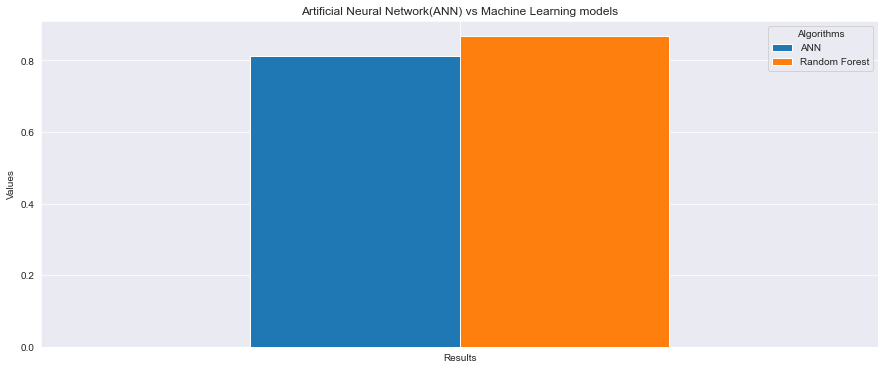

In [41]:
df.plot.bar(ylabel="Values",title="Artificial Neural Network(ANN) vs Machine Learning models",figsize=(15,6))
plt.tick_params(labelrotation=0)
legend_labels = ['ANN', 'Random Forest']
plt.legend(labels = legend_labels, title = 'Algorithms');

**Summary:**

Seems like random forest works best for this case. However, this does not mean that ANN does not predict well since only some variables are being tested due to limited resources and time limit. If time allows and more resources available, think ANN will be the best algorithm to make predictions for case.

Tableau visualisation:

https://public.tableau.com/app/profile/li.lin4779/viz/Creditcardpayment/Dashboard1?publish=yes